In [ ]:
!wget  'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'

--2021-09-22 21:45:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102059 (100K) [application/x-httpd-php]
Saving to: ‘risk_factors_cervical_cancer.csv’

risk_factors_cervic 100%[===================>]  99.67K   638KB/s    in 0.2s    

2021-09-22 21:45:52 (638 KB/s) - ‘risk_factors_cervical_cancer.csv’ saved [102059/102059]



## Data Description

(int) Age <br>
(int) Number of sexual partners<br>
(int) First sexual intercourse (age)<br>
(int) Num of pregnancies<br>
(bool) Smokes<br>
(bool) Smokes (years)<br>
(bool) Smokes (packs/year)<br>
(bool) Hormonal Contraceptives<br>
(int) Hormonal Contraceptives (years)<br>
(bool) IUD<br>
(int) IUD (years)<br>
(bool) STDs<br>
(int) STDs (number)<br>
(bool) STDs:condylomatosis<br>
(bool) STDs:cervical condylomatosis<br>
(bool) STDs:vaginal condylomatosis<br>
(bool) STDs:vulvo-perineal condylomatosis<br>
(bool) STDs:syphilis<br>
(bool) STDs:pelvic inflammatory disease<br>
(bool) STDs:genital herpes<br>
(bool) STDs:molluscum contagiosum<br>
(bool) STDs:AIDS<br>
(bool) STDs:HIV<br>
(bool) STDs:Hepatitis B<br>
(bool) STDs:HPV<br>
(int) STDs: Number of diagnosis<br>
(int) STDs: Time since first diagnosis<br>
(int) STDs: Time since last diagnosis<br>
(bool) Dx:Cancer<br>
(bool) Dx:CIN<br>
(bool) Dx:HPV<br>
(bool) Dx<br>
(bool) Hinselmann: target variable<br>
(bool) Schiller: target variable<br>
(bool) Cytology: target variable<br>
(bool) Biopsy: target variable<br>

# Importing Packages 

In [ ]:
#####
# Importing necessary packages 
#####
import pandas as pd
import numpy as np 
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Dense,Dropout,Conv1D,MaxPooling1D,Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier






## Reading Dataset 

In [ ]:
####
# Reading the dataset 
####
cancer_df = pd.read_csv("/content/risk_factors_cervical_cancer.csv")

In [ ]:
####
# Viewing  the dataset 
####
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


# Dataset Analysis and Prepartion 

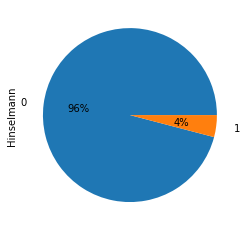

In [ ]:
####
# Plotting Hinselmann column
####
cancer_df['Hinselmann'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

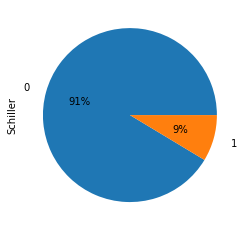

In [ ]:
####
# Plotting Schiller column
####
cancer_df['Schiller'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

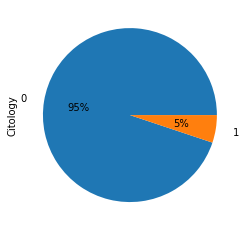

In [ ]:
####
# Plotting Citology column
####
cancer_df['Citology'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

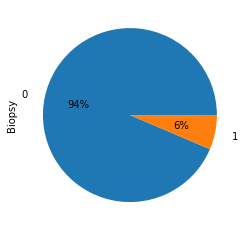

In [ ]:
####
# Plotting Biopsy column
####
cancer_df['Biopsy'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

# Defining the binary classification column

In [ ]:
####
# Creating new column equal to the summation of cancer columns
####
cancer_df["have_cancer"]= cancer_df['Hinselmann']+cancer_df['Schiller']+cancer_df['Citology']+cancer_df['Biopsy']

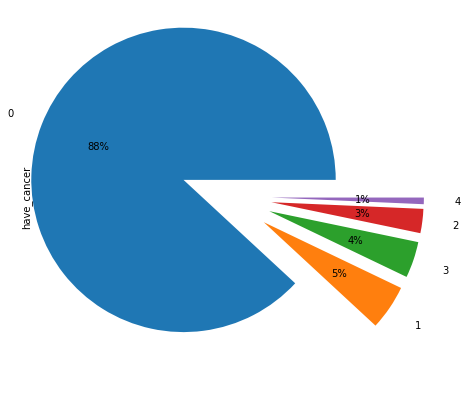

In [ ]:
####
# Plotting have_cancer column
####
cancer_df["have_cancer"].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2 , explode = [0.3]*5 , figsize = (10,7))

In [ ]:
####
# Converting any entry to either 0 if have no cancer or 1 if have cancer 
####
for i , entry in enumerate(cancer_df["have_cancer"]) :
  if cancer_df["have_cancer"][i] in [1,2,3,4]:
    cancer_df.iloc[i,-1] = 1 
  else : 
    cancer_df.iloc[i,-1]  = 0 
  

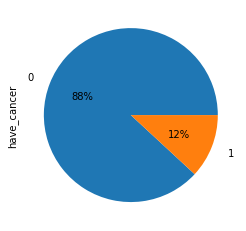

In [ ]:
####
# Plotting have_cancer column after modififcations 
####
cancer_df["have_cancer"].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)


In [ ]:
####
# Removing old columns 
####
cancer_df.drop([ 'Hinselmann',	'Schiller',	'Citology'	,'Biopsy' ] , axis =1 , inplace= True )

In [ ]:
####
# Viewing the dataset after modifcations 
####
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,have_cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0


# Identifying X and Y

In [ ]:
X = cancer_df.iloc[:, :-1]

In [ ]:
Y = cancer_df.iloc[:, -1]

# Sampling process 

In [ ]:
! pip install imblearn

In [ ]:
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Since we cannot use '?' when sampling we will convert it temporary to -1  

In [ ]:
####
# Replacing every '?' with -1
####
X.replace({'?': -1} , inplace=True)

# Doing Sampling Process 
## <font color = Orange >Using SMOTE EDITED NEAREST NEIGHBOUR TECHNIQUE (COMBINATION OF OVERSAMPLING AND UNDERSAMPLING)

In [ ]:
###
# Defining the smote-enn and applying it 
###
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

In [ ]:
###
# Creating Dataframe from sampled X
###
X_resampled_df = pd.DataFrame(X_resampled , columns= X.columns)

In [ ]:
###
# Viewing the dataframe
####
X_resampled_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,15.000000,1.000000,14.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1,34.000000,1.000000,-1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
2,52.000000,5.000000,16.000000,4.000000,1.0,37.000000,37.000000,1.000000,3.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,1.0,0.0,1.0,0.0
3,42.000000,3.000000,23.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
4,44.000000,3.000000,26.000000,4.000000,0.0,0.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,2.924433,16.075567,3.622167,1.0,13.622167,1.396222,1.000000,1.151133,0.0,0.0,1.0,1.075567,0.075567,0.0,0.0,0.075567,0.0,0.0,0.0,0.0,0.0,0.924433,0.0,0.0,1.0,15.319901,15.319901,0.0,0.0,0.0,0.0
1087,25.828841,2.342318,16.657682,-0.315364,1.0,8.657682,1.238747,0.828841,2.486523,0.0,0.0,1.0,2.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,6.657682,6.657682,0.0,0.0,0.0,0.0
1088,31.371387,2.209538,17.000000,2.209538,1.0,9.209538,1.130491,1.000000,9.161849,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1089,29.951583,-0.951583,13.019367,3.000000,1.0,21.854750,3.274823,0.000000,0.000000,0.0,0.0,1.0,1.009683,0.009683,0.0,0.0,0.009683,0.0,0.0,0.0,0.0,0.0,0.990317,0.0,0.0,1.0,3.019367,3.019367,0.0,0.0,0.0,0.0


In [ ]:
###
# Creating Dataframe from sampled y and viewing dataframe
###
Y_resampled_df = pd.DataFrame(y_resampled, columns= ['have_cancer'])
Y_resampled_df

,have_cancer
0,0
1,0
2,0
3,0
4,0
...,...
1086,1
1087,1
1088,1
1089,1


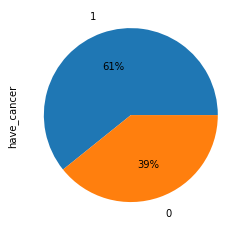

In [ ]:
####
# Plotting have_cancer column after modifications 
####
Y_resampled_df['have_cancer'].value_counts().plot(kind='pie',autopct='%1.0f%%', labeldistance=1.2)

In [ ]:
####
# Getting shape of dataframe 
####
X_resampled_df.shape

(1091, 32)

# Defining Network and helper function 

## Defining Neural Network 

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(60, input_dim=32, activation='relu'))
nn_model.add(Dense(20, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                1980      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


## Defining Convilutional Neural Network

In [ ]:
model = Sequential([
  Conv1D(8, 3, input_shape=(32,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 32, 8)             32        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = X_resampled_df.iloc[:,:]
Y = Y_resampled_df.iloc[:,:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
nn_model.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc = nn_model.evaluate(X_test, Y_test) 
y_pred1 = nn_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

Epoch 1/50
763/763 [==============================] - 5s 3ms/step - loss: 0.8178 - accuracy: 0.6121
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6197 - accuracy: 0.6448
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6153 - accuracy: 0.6776
Epoch 4/50
763/763 [==============================] - 2s 2ms/step - loss: 0.6046 - accuracy: 0.6710
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5943 - accuracy: 0.6684
Epoch 6/50
763/763 [==============================] - 2s 2ms/step - loss: 0.6003 - accuracy: 0.6579
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5626 - accuracy: 0.6881
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5459 - accuracy: 0.6933
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5361 - accuracy: 0.7117
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5426 - accuracy: 0.7025

In [ ]:
y_pred = np.round(y_pred1)
precision= precision_score(Y_test, y_pred , average="macro")
recall = recall_score(Y_test, y_pred , average="macro")
F1_score = f1_score(Y_test, y_pred , average="macro")
cm = confusion_matrix(Y_test, y_pred)

## Defining Helper Function

In [ ]:

def get_part_of_data(limit = 100 , model_mode = 0  ):
  '''
  This Function takes part of dataset feed it to the Neural network choosen then 
  Evalute results 
  Parameters : 
  limit(int) : The number of rows to fetch from dataset
  model_mode (int) : Use Neural network if 0 
                      Use CNN if 1 
  return :
  accuracy (float): Accuracy of the model 
  loss (float): loss of the model 
  -1 : if model_mode is not valid
  '''
  X = X_resampled_df.iloc[:limit,:]
  Y = Y_resampled_df.iloc[:limit,:]
  if model_mode == 0 :
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    nn_model.fit(X_train, Y_train, epochs=50, batch_size=1)
    test_loss, test_acc = nn_model.evaluate(X_test, Y_test) 
    y_pred1 = nn_model.predict(X_test)
    y_pred = np.round(y_pred1)
    # Print f1, precision, and recall scores
    precision= precision_score(Y_test, y_pred , average="macro")
    recall = recall_score(Y_test, y_pred , average="macro")
    F1_score = f1_score(Y_test, y_pred , average="macro")
    cm = confusion_matrix(Y_test, y_pred)
  elif model_mode == 1 : 
    x_train_list = []
    for index , item in X.iterrows() : 
      item = np.expand_dims(item , axis =1)
      x_train_list.append(item)
    X_numpy= np.array(x_train_list)
    X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
    model.fit(X_train, Y_train, epochs=50, batch_size=1)
    test_loss, test_acc = model.evaluate(X_test, Y_test) 
    y_pred1 = model.predict(X_test)
    y_pred = np.round(y_pred1)

    # Print f1, precision, and recall scores
    precision= precision_score(Y_test, y_pred , average="macro")
    recall = recall_score(Y_test, y_pred , average="macro")
    F1_score = f1_score(Y_test, y_pred , average="macro")
    cm = confusion_matrix(Y_test, y_pred)
  else :
    return -1 
  return test_loss, test_acc, precision,recall,F1_score,cm

# Using Neural Network 

In [ ]:
####
# Creating a list to gather in it different losses and accuracies using different sizes of dataset 
####
accuracy_list = [] 
sizes = [500,600,700,800,900,1000,1091]
for size in sizes :
  test_loss, test_acc, precision,recall,F1_score,cm  = get_part_of_data(limit = size , model_mode = 0 )
  accuracy_list.append({'Accuracy' : test_acc , 
                        'Loss':test_loss , 
                        'Precision':precision , 
                        'Recall':recall , 
                        'F1_score':F1_score , 
                        'cm':cm , 
                        "Size":size })


Epoch 1/50
350/350 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8400
Epoch 2/50
350/350 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.9057
Epoch 3/50
350/350 [==============================] - 1s 2ms/step - loss: 0.2849 - accuracy: 0.9200
Epoch 4/50
350/350 [==============================] - 1s 2ms/step - loss: 0.3016 - accuracy: 0.9171
Epoch 5/50
350/350 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.9257
Epoch 6/50
350/350 [==============================] - 1s 2ms/step - loss: 0.2297 - accuracy: 0.9229
Epoch 7/50
350/350 [==============================] - 1s 2ms/step - loss: 0.2142 - accuracy: 0.9371
Epoch 8/50
350/350 [==============================] - 1s 2ms/step - loss: 0.2214 - accuracy: 0.9343
Epoch 9/50
350/350 [==============================] - 1s 2ms/step - loss: 0.2366 - accuracy: 0.9257
Epoch 10/50
350/350 [==============================] - 1s 2ms/step - loss: 0.2208 - accuracy: 0.9343

In [ ]:
####
# Getting accuracy as y-axis 
# Getting Sizes as x-axis 
####

xAxis = []
yAxis_precesion = []
yAxis_recall = []
yAxis_f1_score = []
yAxis_acc = []
confusion_matrix_nn=[]
for dicT in accuracy_list : 
  yAxis_acc.append(dicT['Accuracy'])
  yAxis_f1_score.append(dicT['F1_score'])
  yAxis_recall.append(dicT['Recall'])
  yAxis_precesion.append(dicT['Precision'])
  xAxis.append(dicT['Size'])
  confusion_matrix_nn.append(dicT['cm'])

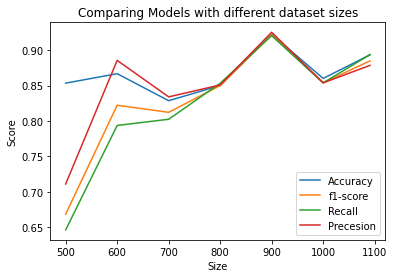

In [ ]:
###
#Plotting accuracy of model using different sizes 
###
plt.plot(xAxis,yAxis_acc, label = "Accuracy")
plt.plot(xAxis,yAxis_f1_score, label = "f1-score")
plt.plot(xAxis,yAxis_recall, label = "Recall")
plt.plot(xAxis,yAxis_precesion, label = "Precesion")

plt.title('Comparing Models with different dataset sizes')
plt.xlabel('Size')
plt.ylabel('Score')
plt.legend()
plt.show()

## Confusion Matrix

In [ ]:
sizes = [500,600,700,800,900,1000,1091]
for size , cm in zip (sizes, confusion_matrix_nn) : 
  print('size' , size)
  print('Confusion Matrix')
  print(cm)



size 500
Confusion Matrix
[[120   7]
 [ 15   8]]
size 600
Confusion Matrix
[[123   3]
 [ 21  33]]
size 700
Confusion Matrix
[[118  10]
 [ 26  56]]
size 800
Confusion Matrix
[[106  24]
 [ 12  98]]
size 900
Confusion Matrix
[[113  15]
 [  6 136]]
size 1000
Confusion Matrix
[[ 98  21]
 [ 21 160]]
size 1091
Confusion Matrix
[[102  12]
 [ 23 191]]


# Using Convloution Nueral Network 

In [ ]:
####
# Creating a list to gather in it different losses and accuracies using different sizes of dataset 
####
accuracy_list_cnn = [] 
sizes = [700,800,900,1000,1091]
for size in sizes :
  test_loss, test_acc, precision,recall,F1_score,cm  = get_part_of_data(limit = size ,model_mode = 1 )
  accuracy_list_cnn.append({'Accuracy' : test_acc , 
                        'Loss':test_loss , 
                        'Precision':precision , 
                        'Recall':recall , 
                        'F1_score':F1_score , 
                        'cm':cm , 
                        "Size":size })


Epoch 1/50
490/490 [==============================] - 30s 3ms/step - loss: 0.7258 - accuracy: 0.6224
Epoch 2/50
490/490 [==============================] - 1s 3ms/step - loss: 0.6206 - accuracy: 0.6531
Epoch 3/50
490/490 [==============================] - 1s 3ms/step - loss: 0.6011 - accuracy: 0.6673
Epoch 4/50
490/490 [==============================] - 1s 3ms/step - loss: 0.5967 - accuracy: 0.6735
Epoch 5/50
490/490 [==============================] - 1s 3ms/step - loss: 0.5818 - accuracy: 0.6776
Epoch 6/50
490/490 [==============================] - 1s 3ms/step - loss: 0.5831 - accuracy: 0.6939
Epoch 7/50
490/490 [==============================] - 1s 3ms/step - loss: 0.5689 - accuracy: 0.7000
Epoch 8/50
490/490 [==============================] - 1s 3ms/step - loss: 0.5579 - accuracy: 0.7143
Epoch 9/50
490/490 [==============================] - 1s 3ms/step - loss: 0.5650 - accuracy: 0.7265
Epoch 10/50
490/490 [==============================] - 1s 3ms/step - loss: 0.5655 - accuracy: 0.716

In [ ]:
####
# Getting accuracy as y-axis 
# Getting Sizes as x-axis 
####
xAxis_cnn = []
yAxis_precesion_cnn = []
yAxis_recall_cnn = []
yAxis_f1_score_cnn = []
yAxis_acc_cnn = []
confusion_matrix_cnn =[]
for dicT in accuracy_list_cnn : 
  yAxis_acc_cnn.append(dicT['Accuracy'])
  yAxis_f1_score_cnn.append(dicT['F1_score'])
  yAxis_recall_cnn.append(dicT['Recall'])
  yAxis_precesion_cnn.append(dicT['Precision'])
  xAxis_cnn.append(dicT['Size'])
  confusion_matrix_cnn.append(dicT['cm'])

In [ ]:
xAxis

[500, 600, 700, 800, 900, 1000, 1091]

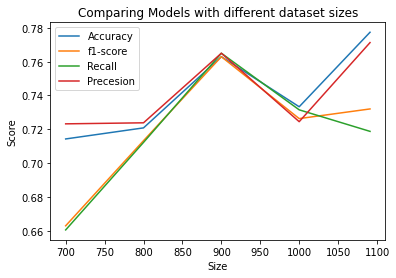

In [ ]:
###
#Plotting accuracy of model using different sizes 
###
plt.plot(xAxis_cnn,yAxis_acc_cnn, label = "Accuracy")
plt.plot(xAxis_cnn,yAxis_f1_score_cnn, label = "f1-score")
plt.plot(xAxis_cnn,yAxis_recall_cnn, label = "Recall")
plt.plot(xAxis_cnn,yAxis_precesion_cnn, label = "Precesion")

plt.title('Comparing Models with different dataset sizes')
plt.xlabel('Size')
plt.ylabel('Score')
plt.legend()
plt.show()

## Confusion Matix

In [ ]:
sizes = [700,800,900,1000,1091]
for size , cm in zip (sizes, confusion_matrix_cnn) : 
  print('size' , size)
  print('Confusion Matrix')
  print(cm)


size 700
Confusion Matrix
[[116  12]
 [ 48  34]]
size 800
Confusion Matrix
[[106  24]
 [ 43  67]]
size 900
Confusion Matrix
[[103  25]
 [ 39 103]]
size 1000
Confusion Matrix
[[ 86  33]
 [ 47 134]]
size 1091
Confusion Matrix
[[ 60  54]
 [ 19 195]]


# Comments 
<font color = 'orange'>

- Using Dataset sizes from 500 to 1091 in Neural Network because using smaller sizes will cause overfitting of model<br> 
-  Using Dataset sizes from 700 to 1091 in Convolutional Neural Network because using smaller sizes will cause overfitting of model 

# Feature Selection

## <font color = 'orange'>Feature Importance
- We can get the feature importance of each feature of our dataset by using the feature importance property of the model.<br>
- Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.<br>
- Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.



In [ ]:
accuracy_list=[]
precesion_list=[]
f1_score_list=[]
recall_list=[]
cm_list=[]


accuracy_list_cnn=[]
precesion_list_cnn=[]
f1_score_list_cnn=[]
recall_list_cnn=[]
cm_list_cnn=[]

## Using top 5 Features

[0.12043189 0.0980671  0.115224   0.07920065 0.03076789 0.02912812
 0.02696777 0.09335195 0.09552699 0.03807751 0.02356667 0.0175619
 0.01271528 0.0139247  0.01127225 0.00699647 0.0181764  0.00854245
 0.01251996 0.00640514 0.00904545 0.00948135 0.01256825 0.01009368
 0.00951453 0.00632695 0.00830213 0.00670643 0.02563739 0.00674872
 0.01581735 0.02133271]


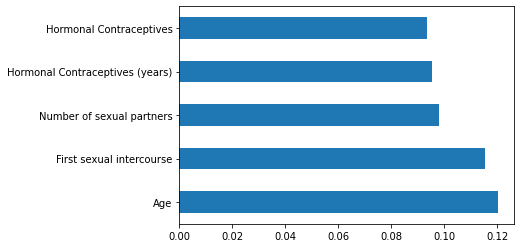

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Build Neural Network 

In [ ]:
nn_model_five_features = Sequential()
nn_model_five_features.add(Dense(60, input_dim=5, activation='relu'))
nn_model_five_features.add(Dense(20, activation='relu'))
nn_model_five_features.add(Dropout(0.5))
nn_model_five_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_five_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_five_features.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                360       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###
#Create Dataframe of top five features
####
X_five_features=X_resampled_df[['Age' ,'Number of sexual partners','First sexual intercourse' , 'Hormonal Contraceptives' , 'Hormonal Contraceptives (years)' ]]

In [ ]:
###
#View Dataframe of top five features
####
X_five_features

,Age,Number of sexual partners,First sexual intercourse,Hormonal Contraceptives,Hormonal Contraceptives (years)
0,15.000000,1.000000,14.000000,0.000000,0.000000
1,34.000000,1.000000,-1.000000,0.000000,0.000000
2,52.000000,5.000000,16.000000,1.000000,3.000000
3,42.000000,3.000000,23.000000,0.000000,0.000000
4,44.000000,3.000000,26.000000,1.000000,2.000000
...,...,...,...,...,...
1086,32.471034,2.924433,16.075567,1.000000,1.151133
1087,25.828841,2.342318,16.657682,0.828841,2.486523
1088,31.371387,2.209538,17.000000,1.000000,9.161849
1089,29.951583,-0.951583,13.019367,0.000000,0.000000


In [ ]:

####
# Train and test NN model 
####

X_train, X_test, Y_train, Y_test = train_test_split(X_five_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_five_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_five = nn_model_five_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_five_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_five_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_five_features = recall_score(Y_test, y_pred , average="binary")
F1_score_five_features = f1_score(Y_test, y_pred , average="binary")
cm_five_features = confusion_matrix(Y_test, y_pred)



accuracy_list.append(test_acc_five)
precesion_list.append(precision_five_features)
f1_score_list.append(F1_score_five_features)
recall_list.append(recall_five_features)
cm_list.append(cm_five_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.8245 - accuracy: 0.5885
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6690 - accuracy: 0.5885
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6678 - accuracy: 0.6212
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6675 - accuracy: 0.6003
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6517 - accuracy: 0.6291
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6359 - accuracy: 0.6396
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6262 - accuracy: 0.6514
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6224 - accuracy: 0.6527
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6057 - accuracy: 0.6684
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6114 - accuracy: 0.6645

## Create CNN Model

In [ ]:
model_cnn_five = Sequential([
  Conv1D(8, 3, input_shape=(5,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_five.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_five.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 5, 8)              32        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 8)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:

###
# Train and test CNN model 
###


x_train_list = []
for index , item in X_five_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_five.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_five, test_acc_cnn_five = model_cnn_five.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_five.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_five= precision_score(Y_test, y_pred , average="macro")
recall_cnn_five = recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_five = f1_score(Y_test, y_pred , average="macro")
cm_cnn_five= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_five)
precesion_list_cnn.append(precision_cnn_five)
f1_score_list_cnn.append(F1_score_cnn_five)
recall_list_cnn.append(recall_cnn_five)
cm_list_cnn.append(cm_cnn_five)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.9027 - accuracy: 0.5190
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6889 - accuracy: 0.5858
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6665 - accuracy: 0.5858
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6643 - accuracy: 0.6055
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6502 - accuracy: 0.6107
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6519 - accuracy: 0.6304
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6421 - accuracy: 0.6330
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6417 - accuracy: 0.6488
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6349 - accuracy: 0.6383
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6336 - accuracy: 0.6291

## Using Top 10 Features

[0.11810362 0.10121131 0.1151122  0.07744713 0.0282986  0.03114661
 0.02665017 0.09240894 0.092674   0.03549935 0.02765907 0.01689691
 0.01230198 0.01516268 0.00862322 0.00961192 0.01531838 0.00919481
 0.01028381 0.00515185 0.01142653 0.00869952 0.01372481 0.0105184
 0.01327783 0.00592729 0.00859001 0.00801363 0.01874162 0.00743176
 0.02539459 0.01949744]


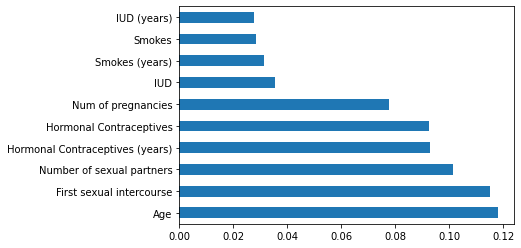

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Creating Neural Network

In [ ]:
nn_model_ten_features = Sequential()
nn_model_ten_features.add(Dense(60, input_dim=10, activation='relu'))
nn_model_ten_features.add(Dense(20, activation='relu'))
nn_model_ten_features.add(Dropout(0.5))
nn_model_ten_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_ten_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_ten_features.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 60)                660       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
####
# Creating top 10 features dataframe
####
X_ten_features=X_resampled_df[['Age' ,'Number of sexual partners','First sexual intercourse' , 'Hormonal Contraceptives' , 'Hormonal Contraceptives (years)','Num of pregnancies','Smokes' ,'Smokes (years)','IUD','IUD (years)']]

In [ ]:
####
# Viewing top 10 features dataframe
####
X_ten_features

,Age,Number of sexual partners,First sexual intercourse,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,Smokes,Smokes (years),IUD,IUD (years)
0,15.000000,1.000000,14.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0
1,34.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0
2,52.000000,5.000000,16.000000,1.000000,3.000000,4.000000,1.0,37.000000,0.0,0.0
3,42.000000,3.000000,23.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.0,0.0
4,44.000000,3.000000,26.000000,1.000000,2.000000,4.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,2.924433,16.075567,1.000000,1.151133,3.622167,1.0,13.622167,0.0,0.0
1087,25.828841,2.342318,16.657682,0.828841,2.486523,-0.315364,1.0,8.657682,0.0,0.0
1088,31.371387,2.209538,17.000000,1.000000,9.161849,2.209538,1.0,9.209538,0.0,0.0
1089,29.951583,-0.951583,13.019367,0.000000,0.000000,3.000000,1.0,21.854750,0.0,0.0


In [ ]:
####
# Training and testing NN model
####


X_train, X_test, Y_train, Y_test = train_test_split(X_ten_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_ten_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_ten = nn_model_ten_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_ten_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_ten_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_ten_features = recall_score(Y_test, y_pred , average="binary")
F1_score_ten_features = f1_score(Y_test, y_pred , average="binary")
cm_ten_features = confusion_matrix(Y_test, y_pred)





accuracy_list.append(test_acc_ten)
precesion_list.append(precision_ten_features)
f1_score_list.append(F1_score_ten_features)
recall_list.append(recall_ten_features)
cm_list.append(cm_ten_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7929 - accuracy: 0.5242
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6786 - accuracy: 0.5819
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6529 - accuracy: 0.6094
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6419 - accuracy: 0.6370
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6305 - accuracy: 0.6239
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6418 - accuracy: 0.6265
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6286 - accuracy: 0.6265
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6186 - accuracy: 0.6304
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6024 - accuracy: 0.6422
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6226 - accuracy: 0.6304

## Creating CNN model

In [ ]:
model_cnn_ten = Sequential([
  Conv1D(8, 3, input_shape=(10,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_ten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_ten.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 10, 8)             32        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 8)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_list = []
for index , item in X_ten_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_ten.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_ten, test_acc_cnn_ten = model_cnn_ten.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_ten.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_ten= precision_score(Y_test, y_pred , average="macro")
recall_cnn_ten= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_ten = f1_score(Y_test, y_pred , average="macro")
cm_cnn_ten= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_ten)
precesion_list_cnn.append(precision_cnn_ten)
f1_score_list_cnn.append(F1_score_cnn_ten)
recall_list_cnn.append(recall_cnn_ten)
cm_list_cnn.append(cm_cnn_ten)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7007 - accuracy: 0.5518
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6585 - accuracy: 0.6121
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6392 - accuracy: 0.6029
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6352 - accuracy: 0.6461
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6240 - accuracy: 0.6396
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6173 - accuracy: 0.6448
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6169 - accuracy: 0.6317
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6152 - accuracy: 0.6435
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6082 - accuracy: 0.6619
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6087 - accuracy: 0.6474

## Using top 15 Features

[0.1180024  0.09873162 0.11947678 0.08082408 0.02921722 0.02920342
 0.02797326 0.08927001 0.08854835 0.03334325 0.0270377  0.01673761
 0.00936129 0.01352735 0.01493507 0.00624313 0.02113461 0.0118729
 0.00872835 0.00522509 0.01203557 0.01108189 0.01096668 0.00841691
 0.01044535 0.00744707 0.00900266 0.00876805 0.02153479 0.00701254
 0.02506793 0.01882705]


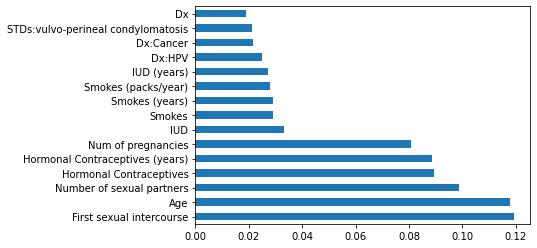

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Creating NN Model

In [ ]:
nn_model_15_features = Sequential()
nn_model_15_features.add(Dense(60, input_dim=15, activation='relu'))
nn_model_15_features.add(Dense(20, activation='relu'))
nn_model_15_features.add(Dropout(0.5))
nn_model_15_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_15_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_15_features.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 60)                960       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
####
# Getting the top 15 Feature in dataframe
####

X_15_features=X_resampled_df[feat_importances.nlargest(15).index]

In [ ]:
####
# Viewing the top 15 Feature dataframe
####
X_15_features

,First sexual intercourse,Age,Number of sexual partners,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,IUD,Smokes,Smokes (years),Smokes (packs/year),IUD (years),Dx:HPV,Dx:Cancer,STDs:vulvo-perineal condylomatosis,Dx
0,14.000000,15.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,-1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,16.000000,52.000000,5.000000,1.000000,3.000000,4.000000,0.0,1.0,37.000000,37.000000,0.0,1.0,1.0,0.000000,0.0
3,23.000000,42.000000,3.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,26.000000,44.000000,3.000000,1.000000,2.000000,4.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,16.075567,32.471034,2.924433,1.000000,1.151133,3.622167,0.0,1.0,13.622167,1.396222,0.0,0.0,0.0,0.075567,0.0
1087,16.657682,25.828841,2.342318,0.828841,2.486523,-0.315364,0.0,1.0,8.657682,1.238747,0.0,0.0,0.0,1.000000,0.0
1088,17.000000,31.371387,2.209538,1.000000,9.161849,2.209538,0.0,1.0,9.209538,1.130491,0.0,0.0,0.0,0.000000,0.0
1089,13.019367,29.951583,-0.951583,0.000000,0.000000,3.000000,0.0,1.0,21.854750,3.274823,0.0,0.0,0.0,0.009683,0.0


In [ ]:

####
# Training and testing the NN model 
####

X_train, X_test, Y_train, Y_test = train_test_split(X_15_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_15_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_15 = nn_model_15_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_15_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_15_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_15_features = recall_score(Y_test, y_pred , average="binary")
F1_score_15_features = f1_score(Y_test, y_pred , average="binary")
cm_15_features = confusion_matrix(Y_test, y_pred)



accuracy_list.append(test_acc_15)
precesion_list.append(precision_15_features)
f1_score_list.append(F1_score_15_features)
recall_list.append(recall_15_features)
cm_list.append(cm_15_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.8260 - accuracy: 0.5740
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6460 - accuracy: 0.6474
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6076 - accuracy: 0.6632
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5859 - accuracy: 0.6710
Epoch 5/50
763/763 [==============================] - 2s 2ms/step - loss: 0.5814 - accuracy: 0.6776
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5647 - accuracy: 0.6802
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5676 - accuracy: 0.6789
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5482 - accuracy: 0.6907
Epoch 9/50
763/763 [==============================] - 2s 2ms/step - loss: 0.5454 - accuracy: 0.6881
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5161 - accuracy: 0.7274

## Creating the CNN Model

In [ ]:
model_cnn_15 = Sequential([
  Conv1D(8, 3, input_shape=(15,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_15.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_15.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 15, 8)             32        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 8, 8)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_list = []
for index , item in X_15_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_15.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_15, test_acc_cnn_15 = model_cnn_15.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_15.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_15= precision_score(Y_test, y_pred , average="macro")
recall_cnn_15= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_15 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_15= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_15)
precesion_list_cnn.append(precision_cnn_15)
f1_score_list_cnn.append(F1_score_cnn_15)
recall_list_cnn.append(recall_cnn_15)
cm_list_cnn.append(cm_cnn_15)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6998 - accuracy: 0.6239
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6124 - accuracy: 0.6789
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5881 - accuracy: 0.6592
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5715 - accuracy: 0.6802
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5617 - accuracy: 0.6881
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.6789
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5543 - accuracy: 0.6750
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5455 - accuracy: 0.6776
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5341 - accuracy: 0.6933
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5437 - accuracy: 0.6881

## Using Top 20 Features 

[0.12742895 0.09902964 0.10862128 0.07971543 0.031927   0.0299739
 0.0257721  0.09146333 0.09132306 0.03664244 0.02971467 0.01362826
 0.00861051 0.01564789 0.00728597 0.00875466 0.01457502 0.01089825
 0.0123164  0.00986048 0.01361519 0.00747313 0.0128187  0.00956146
 0.01074819 0.00777055 0.0068359  0.00713222 0.02329996 0.00685894
 0.02030969 0.0203868 ]


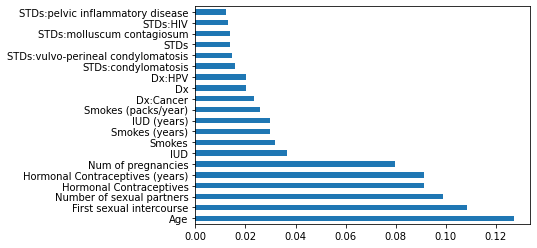

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Creating Neural Network

In [ ]:
nn_model_20_features = Sequential()
nn_model_20_features.add(Dense(60, input_dim=20, activation='relu'))
nn_model_20_features.add(Dense(20, activation='relu'))
nn_model_20_features.add(Dropout(0.5))
nn_model_20_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_20_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_20_features.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 60)                1260      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###
#Creating top 20 Features Dataframe
####

X_20_features=X_resampled_df[feat_importances.nlargest(20).index]

In [ ]:
###
#Viewing top 20 Features Dataframe
####

X_20_features

,Age,First sexual intercourse,Number of sexual partners,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,IUD,Smokes,Smokes (years),IUD (years),Smokes (packs/year),Dx:Cancer,Dx,Dx:HPV,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs,STDs:molluscum contagiosum,STDs:HIV,STDs:pelvic inflammatory disease
0,15.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,34.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,52.000000,16.000000,5.000000,1.000000,3.000000,4.000000,0.0,1.0,37.000000,0.0,37.000000,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,42.000000,23.000000,3.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,44.000000,26.000000,3.000000,1.000000,2.000000,4.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,16.075567,2.924433,1.000000,1.151133,3.622167,0.0,1.0,13.622167,0.0,1.396222,0.0,0.0,0.0,0.075567,0.075567,1.0,0.0,0.924433,0.0
1087,25.828841,16.657682,2.342318,0.828841,2.486523,-0.315364,0.0,1.0,8.657682,0.0,1.238747,0.0,0.0,0.0,1.000000,1.000000,1.0,0.0,0.000000,0.0
1088,31.371387,17.000000,2.209538,1.000000,9.161849,2.209538,0.0,1.0,9.209538,0.0,1.130491,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1089,29.951583,13.019367,-0.951583,0.000000,0.000000,3.000000,0.0,1.0,21.854750,0.0,3.274823,0.0,0.0,0.0,0.009683,0.009683,1.0,0.0,0.990317,0.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_20_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_20_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_20 = nn_model_20_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_20_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_20_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_20_features = recall_score(Y_test, y_pred , average="binary")
F1_score_20_features = f1_score(Y_test, y_pred , average="binary")
cm_20_features = confusion_matrix(Y_test, y_pred)






accuracy_list.append(test_acc_20)
precesion_list.append(precision_20_features)
f1_score_list.append(F1_score_20_features)
recall_list.append(recall_20_features)
cm_list.append(cm_20_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.8300 - accuracy: 0.5740
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6236 - accuracy: 0.6645
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6076 - accuracy: 0.6645
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5960 - accuracy: 0.6789
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5798 - accuracy: 0.6776
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5600 - accuracy: 0.7051
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5485 - accuracy: 0.6959
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.6907
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.7038
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5488 - accuracy: 0.6999

## Creating CNN Model

In [ ]:
model_cnn_20 = Sequential([
  Conv1D(8, 3, input_shape=(20,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_20.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 20, 8)             32        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 8)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 81        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_list = []
for index , item in X_20_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_20.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_20, test_acc_cnn_20 = model_cnn_20.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_20.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_20= precision_score(Y_test, y_pred , average="macro")
recall_cnn_20= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_20 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_20= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_20)
precesion_list_cnn.append(precision_cnn_20)
f1_score_list_cnn.append(F1_score_cnn_20)
recall_list_cnn.append(recall_cnn_20)
cm_list_cnn.append(cm_cnn_20)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7423 - accuracy: 0.5832
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6021 - accuracy: 0.6684
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5698 - accuracy: 0.6514
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5557 - accuracy: 0.6763
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5434 - accuracy: 0.6855
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5351 - accuracy: 0.7143
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5266 - accuracy: 0.7117
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5228 - accuracy: 0.7208
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5139 - accuracy: 0.7300
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5201 - accuracy: 0.7235

## Using Top 25 Features

[0.12069368 0.10069031 0.11604598 0.07659903 0.02945717 0.03104527
 0.02767823 0.09613586 0.08715925 0.03541061 0.02710509 0.01332293
 0.01000151 0.01952864 0.01433004 0.00708535 0.01947086 0.01059364
 0.00798457 0.00553291 0.01396805 0.00818351 0.01351615 0.00596167
 0.0086305  0.00579277 0.0074883  0.00905418 0.02472389 0.007732
 0.01994667 0.01913136]


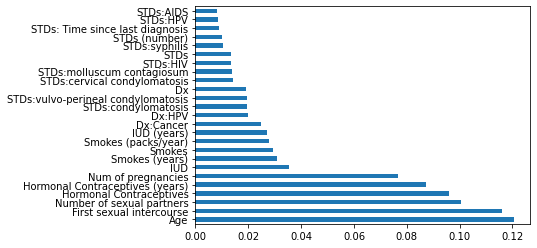

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

## Creating Neural Network

In [ ]:
nn_model_25_features = Sequential()
nn_model_25_features.add(Dense(60, input_dim=25, activation='relu'))
nn_model_25_features.add(Dense(20, activation='relu'))
nn_model_25_features.add(Dropout(0.5))
nn_model_25_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_25_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_25_features.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 60)                1560      
_________________________________________________________________
dense_21 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 21        
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###
#Creating top 25 features dataframe
###
X_25_features=X_resampled_df[feat_importances.nlargest(25).index]

In [ ]:
###
#Viewing top 25 features dataframe
###
X_25_features

,Age,First sexual intercourse,Number of sexual partners,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,IUD,Smokes (years),Smokes,Smokes (packs/year),IUD (years),Dx:Cancer,Dx:HPV,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,Dx,STDs:cervical condylomatosis,STDs:molluscum contagiosum,STDs:HIV,STDs,STDs:syphilis,STDs (number),STDs: Time since last diagnosis,STDs:HPV,STDs:AIDS
0,15.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.000000,0.0,0.0
1,34.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.000000,0.0,0.0
2,52.000000,16.000000,5.000000,1.000000,3.000000,4.000000,0.0,37.000000,1.0,37.000000,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.000000,0.0,0.0
3,42.000000,23.000000,3.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.000000,0.0,0.0
4,44.000000,26.000000,3.000000,1.000000,2.000000,4.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,16.075567,2.924433,1.000000,1.151133,3.622167,0.0,13.622167,1.0,1.396222,0.0,0.0,0.0,0.075567,0.075567,0.0,0.0,0.0,0.924433,1.0,0.0,1.075567,15.319901,0.0,0.0
1087,25.828841,16.657682,2.342318,0.828841,2.486523,-0.315364,0.0,8.657682,1.0,1.238747,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.000000,1.0,0.0,2.000000,6.657682,0.0,0.0
1088,31.371387,17.000000,2.209538,1.000000,9.161849,2.209538,0.0,9.209538,1.0,1.130491,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-1.000000,0.0,0.0
1089,29.951583,13.019367,-0.951583,0.000000,0.000000,3.000000,0.0,21.854750,1.0,3.274823,0.0,0.0,0.0,0.009683,0.009683,0.0,0.0,0.0,0.990317,1.0,0.0,1.009683,3.019367,0.0,0.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_25_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_25_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_25 = nn_model_25_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_25_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_25_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_25_features = recall_score(Y_test, y_pred , average="binary")
F1_score_25_features = f1_score(Y_test, y_pred , average="binary")
cm_25_features = confusion_matrix(Y_test, y_pred)




accuracy_list.append(test_acc_25)
precesion_list.append(precision_25_features)
f1_score_list.append(F1_score_25_features)
recall_list.append(recall_25_features)
cm_list.append(cm_25_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.8737 - accuracy: 0.5924
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6415 - accuracy: 0.6199
Epoch 3/50
763/763 [==============================] - 2s 2ms/step - loss: 0.6126 - accuracy: 0.6514
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6074 - accuracy: 0.6710
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5900 - accuracy: 0.6802
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5736 - accuracy: 0.6776
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5712 - accuracy: 0.6737
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5604 - accuracy: 0.7077
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5454 - accuracy: 0.6972
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5378 - accuracy: 0.6959

## Creating CNN Model

In [ ]:
model_cnn_25 = Sequential([
  Conv1D(8, 3, input_shape=(25,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_25.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_25.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 25, 8)             32        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 13, 8)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 104)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 105       
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_list = []
for index , item in X_25_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_25.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_25, test_acc_cnn_25 = model_cnn_25.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_25.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_25= precision_score(Y_test, y_pred , average="macro")
recall_cnn_25= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_25 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_25= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_25)
precesion_list_cnn.append(precision_cnn_25)
f1_score_list_cnn.append(F1_score_cnn_25)
recall_list_cnn.append(recall_cnn_25)
cm_list_cnn.append(cm_cnn_25)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.8585 - accuracy: 0.6435
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5782 - accuracy: 0.6802
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5680 - accuracy: 0.6815
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5571 - accuracy: 0.6986
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5501 - accuracy: 0.7025
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5540 - accuracy: 0.7051
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5349 - accuracy: 0.6999
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5286 - accuracy: 0.7287
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5334 - accuracy: 0.7143
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5214 - accuracy: 0.7090

## Using all Features

[0.11712049 0.10287462 0.11297031 0.07978281 0.03111285 0.03092768
 0.02683426 0.09661984 0.09430116 0.03414027 0.02547218 0.01564494
 0.01006729 0.01685829 0.00901147 0.00739253 0.01669453 0.01499257
 0.00673482 0.00894453 0.00669111 0.00656306 0.01505959 0.00973031
 0.01147619 0.00592349 0.00930399 0.00641647 0.02067774 0.00694798
 0.0217441  0.02096856]


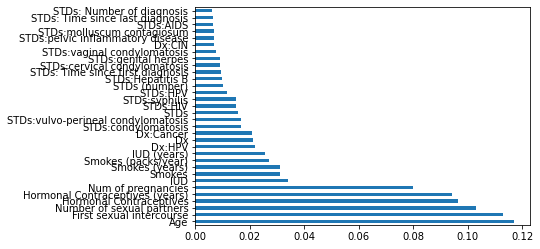

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(32).plot(kind='barh')

plt.show()

## Creating Neural Network

In [ ]:
nn_model_all_features = Sequential()
nn_model_all_features.add(Dense(60, input_dim=32, activation='relu'))
nn_model_all_features.add(Dense(20, activation='relu'))
nn_model_all_features.add(Dropout(0.5))
nn_model_all_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_all_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_all_features.summary()

NameError: ignored

In [ ]:
###
# Viewing all features dataframe
###
X_resampled_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,15.000000,1.000000,14.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1,34.000000,1.000000,-1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
2,52.000000,5.000000,16.000000,4.000000,1.0,37.000000,37.000000,1.000000,3.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,1.0,0.0,1.0,0.0
3,42.000000,3.000000,23.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
4,44.000000,3.000000,26.000000,4.000000,0.0,0.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,2.924433,16.075567,3.622167,1.0,13.622167,1.396222,1.000000,1.151133,0.0,0.0,1.0,1.075567,0.075567,0.0,0.0,0.075567,0.0,0.0,0.0,0.0,0.0,0.924433,0.0,0.0,1.0,15.319901,15.319901,0.0,0.0,0.0,0.0
1087,25.828841,2.342318,16.657682,-0.315364,1.0,8.657682,1.238747,0.828841,2.486523,0.0,0.0,1.0,2.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,6.657682,6.657682,0.0,0.0,0.0,0.0
1088,31.371387,2.209538,17.000000,2.209538,1.0,9.209538,1.130491,1.000000,9.161849,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1089,29.951583,-0.951583,13.019367,3.000000,1.0,21.854750,3.274823,0.000000,0.000000,0.0,0.0,1.0,1.009683,0.009683,0.0,0.0,0.009683,0.0,0.0,0.0,0.0,0.0,0.990317,0.0,0.0,1.0,3.019367,3.019367,0.0,0.0,0.0,0.0


In [ ]:
####
#Training and testing the model
####

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_df, Y_resampled_df, test_size=0.3, random_state=0,shuffle = True)
nn_model_all_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_all = nn_model_all_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_all_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_all_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_all_features = recall_score(Y_test, y_pred , average="binary")
F1_score_all_features = f1_score(Y_test, y_pred , average="binary")
cm_all_features = confusion_matrix(Y_test, y_pred)



accuracy_list.append(test_acc_all)
precesion_list.append(precision_all_features)
f1_score_list.append(F1_score_all_features)
recall_list.append(recall_all_features)
cm_list.append(cm_all_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7725 - accuracy: 0.6147
Epoch 2/50
763/763 [==============================] - 2s 2ms/step - loss: 0.6176 - accuracy: 0.6619
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5979 - accuracy: 0.6684
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5923 - accuracy: 0.6763
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5569 - accuracy: 0.6723
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5567 - accuracy: 0.6723
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5493 - accuracy: 0.6710
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5303 - accuracy: 0.7025
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5235 - accuracy: 0.7143
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5016 - accuracy: 0.7077

In [ ]:
x_train_list = []
for index , item in X_resampled_df.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_all, test_acc_cnn_all = model.evaluate(X_test, Y_test) 
y_pred1 = model.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_all= precision_score(Y_test, y_pred , average="macro")
recall_cnn_all = recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_all = f1_score(Y_test, y_pred , average="macro")
cm_cnn_all = confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_all)
precesion_list_cnn.append(precision_cnn_all)
f1_score_list_cnn.append(F1_score_cnn_all)
recall_list_cnn.append(recall_cnn_all)
cm_list_cnn.append(cm_cnn_all)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4472 - accuracy: 0.7588
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4375 - accuracy: 0.7851
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4507 - accuracy: 0.7602
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4469 - accuracy: 0.7903
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4421 - accuracy: 0.7759
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4522 - accuracy: 0.7680
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4411 - accuracy: 0.7785
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4477 - accuracy: 0.7641
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4423 - accuracy: 0.7811
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4453 - accuracy: 0.7824

## Evaluating Results

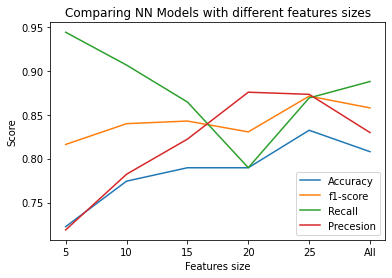

In [ ]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list, label = "Accuracy")
plt.plot(xAxis,f1_score_list, label = "f1-score")
plt.plot(xAxis,recall_list, label = "Recall")
plt.plot(xAxis,precesion_list, label = "Precesion")

plt.title('Comparing NN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend()
plt.show()




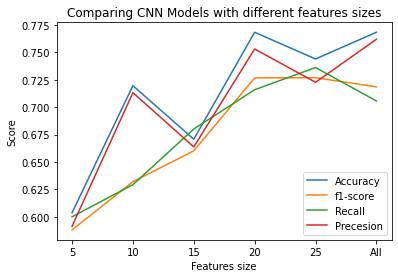

In [ ]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_cnn, label = "Accuracy")
plt.plot(xAxis,f1_score_list_cnn, label = "f1-score")
plt.plot(xAxis,recall_list_cnn, label = "Recall")
plt.plot(xAxis,precesion_list_cnn, label = "Precesion")

plt.title('Comparing CNN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend()
plt.show()




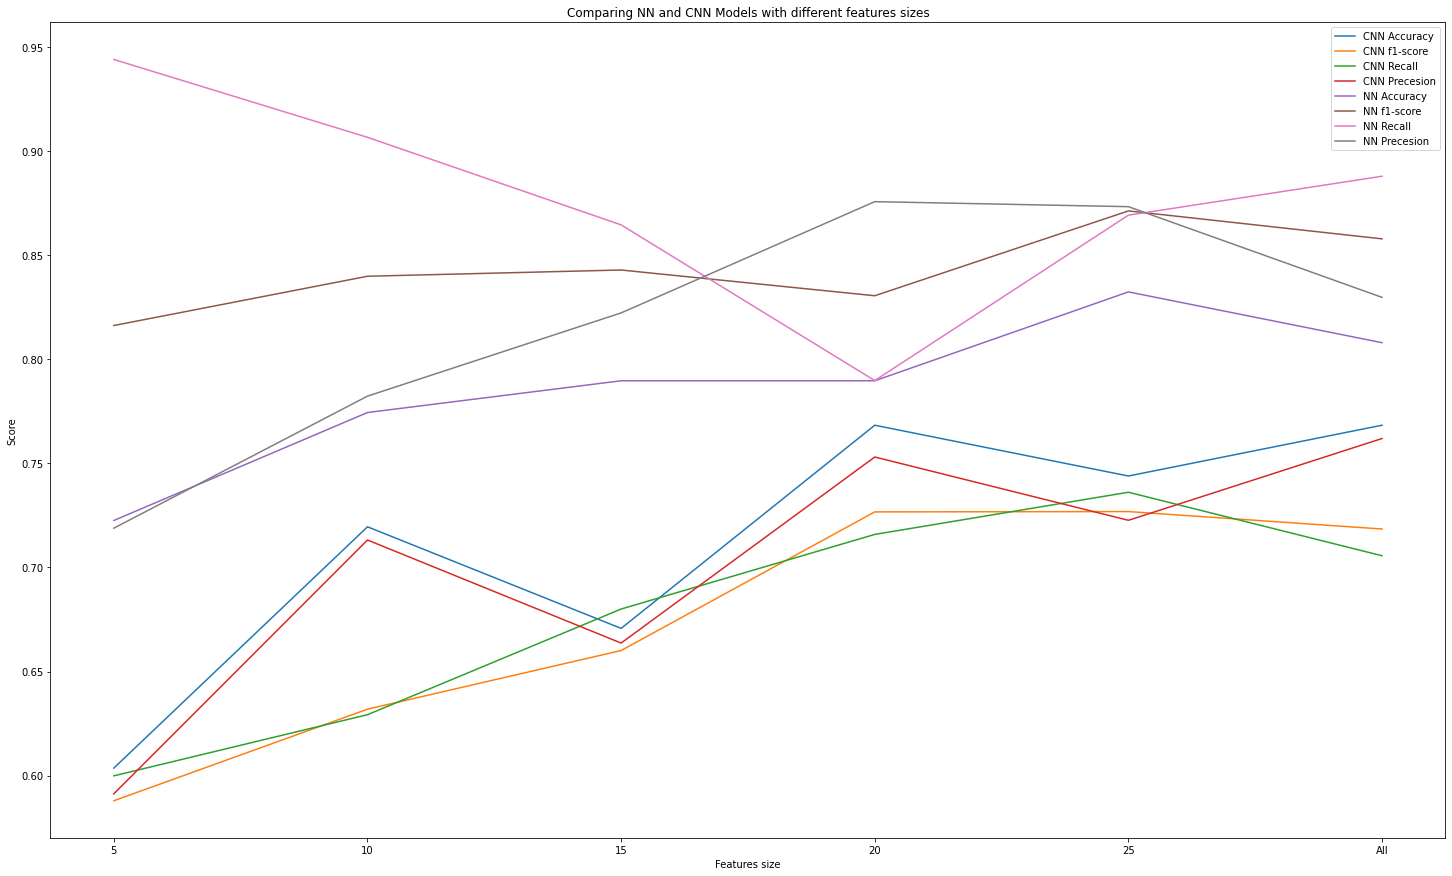

<Figure size 720x504 with 0 Axes>

In [ ]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_cnn, label = "CNN Accuracy")
plt.plot(xAxis,f1_score_list_cnn, label = "CNN f1-score")
plt.plot(xAxis,recall_list_cnn, label = "CNN Recall")
plt.plot(xAxis,precesion_list_cnn, label = "CNN Precesion")

plt.plot(xAxis,accuracy_list, label = "NN Accuracy")
plt.plot(xAxis,f1_score_list, label = "NN f1-score")
plt.plot(xAxis,recall_list, label = "NN Recall")
plt.plot(xAxis,precesion_list, label = "NN Precesion")


plt.title('Comparing NN and CNN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();
plt.figure(figsize=(10,7)) ; 
plt.show();




## Confusion Matrix

In [ ]:
feature_sizes = [5,10,15,20,25,'All']
print( 'NN Models ' )
for feature_size , confusion_matrix in zip(feature_sizes ,cm_list):
  print( 'size' , feature_size )
  print( 'confusion matrix ' )
  print(confusion_matrix)
  print('-----')
print('------------------')
print('------------------')
print('------------------')
print( 'CNN Models ' )
for feature_size , confusion_matrix in zip(feature_sizes ,cm_list_cnn):
  print( 'size' , feature_size )
  print( 'confusion matrix ' )
  print(confusion_matrix)
  print('-----')

NN Models 
size 5
confusion matrix 
[[ 35  79]
 [ 12 202]]
-----
size 10
confusion matrix 
[[ 60  54]
 [ 20 194]]
-----
size 15
confusion matrix 
[[ 74  40]
 [ 29 185]]
-----
size 20
confusion matrix 
[[ 90  24]
 [ 45 169]]
-----
size 25
confusion matrix 
[[ 87  27]
 [ 28 186]]
-----
size All
confusion matrix 
[[ 75  39]
 [ 24 190]]
-----
------------------
------------------
------------------
CNN Models 
size 5
confusion matrix 
[[ 67  47]
 [ 83 131]]
-----
size 10
confusion matrix 
[[ 38  76]
 [ 16 198]]
-----
size 15
confusion matrix 
[[ 81  33]
 [ 75 139]]
-----
size 20
confusion matrix 
[[ 62  52]
 [ 24 190]]
-----
size 25
confusion matrix 
[[ 81  33]
 [ 51 163]]
-----
size All
confusion matrix 
[[ 57  57]
 [ 19 195]]
-----


# Feature Binning and Discretization

In [ ]:
X_resampled_df_1 = X_resampled_df.copy()

Best Columns to make discretization upon is 
- Age	
- Number of sexual partners	
- First sexual intercourse	
- Num of pregnancies

## Using pandas qcut functionality to make the transform
<img src = 'https://i.stack.imgur.com/pObHa.png'>

In [ ]:
X_resampled_df_1['Age'] = pd.qcut(X_resampled_df_1['Age'], 10, labels=False)
X_resampled_df_1['Number of sexual partners'] = X_resampled_df_1['Number of sexual partners'].rank(method='first')
X_resampled_df_1['Number of sexual partners'] = pd.qcut(X_resampled_df_1['Number of sexual partners'], 10, labels=False)
X_resampled_df_1['First sexual intercourse'] = X_resampled_df_1['First sexual intercourse'].rank(method='first')
X_resampled_df_1['First sexual intercourse'] = pd.qcut(X_resampled_df_1['First sexual intercourse'], 10, labels=False)
X_resampled_df_1['Num of pregnancies'] = X_resampled_df_1['Num of pregnancies'].rank(method='first')
X_resampled_df_1['Num of pregnancies'] = pd.qcut(X_resampled_df_1['Num of pregnancies'], 10, labels=False)

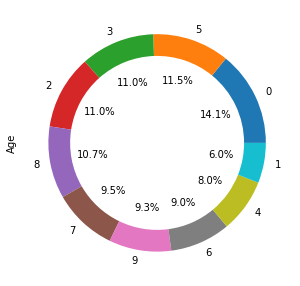

In [ ]:
X_resampled_df_1.Age.value_counts().plot(kind='pie',autopct ='%1.1f%%',wedgeprops=dict(width=.2) , figsize = (10,5))

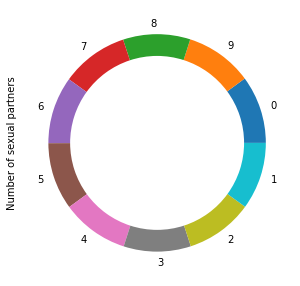

In [ ]:
X_resampled_df_1['Number of sexual partners'].value_counts().plot(kind='pie',wedgeprops=dict(width=.2) , figsize = (10,5)) ;


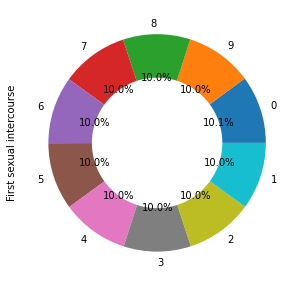

In [ ]:
X_resampled_df_1['First sexual intercourse'].value_counts().plot(kind='pie',autopct ='%1.1f%%',wedgeprops=dict(width=.4) , figsize = (10,5)) ; 


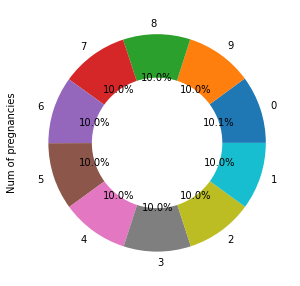

In [ ]:
X_resampled_df_1['Num of pregnancies'].value_counts().plot(kind='pie',autopct ='%1.1f%%',wedgeprops=dict(width=.4) , figsize = (10,5))

## <font color = 'orange'>Feature Importance
- We can get the feature importance of each feature of our dataset by using the feature importance property of the model.<br>
- Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.<br>
- Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.



In [ ]:
from sklearn.metrics import confusion_matrix
accuracy_list_discretization=[]
precesion_list_discretization=[]
f1_score_list_discretization=[]
recall_list_discretization=[]
cm_list_discretization=[]


accuracy_list_discretization_cnn=[]
precesion_list_discretization_cnn=[]
f1_score_list_discretization_cnn=[]
recall_list_discretization_cnn=[]
cm_list_discretization_cnn=[]

## Using top 5 Features

[0.08705333 0.14592267 0.10458271 0.11151595 0.03036359 0.02864498
 0.02812101 0.07654759 0.08229036 0.02874926 0.02342672 0.01460414
 0.01313635 0.01383615 0.0087922  0.00747843 0.01515555 0.01060174
 0.0065172  0.00767834 0.01836961 0.01072059 0.01538891 0.00974781
 0.00685684 0.00684988 0.00887078 0.0081869  0.01964616 0.00807248
 0.02261524 0.01965653]


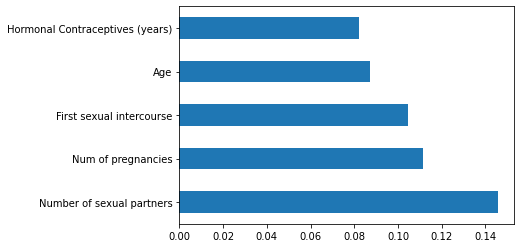

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Build Neural Network 

In [ ]:
nn_model_five_features = Sequential()
nn_model_five_features.add(Dense(60, input_dim=5, activation='relu'))
nn_model_five_features.add(Dense(20, activation='relu'))
nn_model_five_features.add(Dropout(0.5))
nn_model_five_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_five_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_five_features.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 60)                360       
_________________________________________________________________
dense_28 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 21        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###
#Create Dataframe of top five features
####
X_five_features=X_resampled_df_1[['Age' ,'Number of sexual partners','First sexual intercourse' , 'Hormonal Contraceptives' , 'Hormonal Contraceptives (years)' ]]

In [ ]:
###
#View Dataframe of top five features
####
X_five_features

,Age,Number of sexual partners,First sexual intercourse,Hormonal Contraceptives,Hormonal Contraceptives (years)
0,0,0,0,0.000000,0.000000
1,8,0,0,0.000000,0.000000
2,9,9,3,1.000000,3.000000
3,9,6,9,0.000000,0.000000
4,9,6,9,1.000000,2.000000
...,...,...,...,...,...
1086,7,6,4,1.000000,1.151133
1087,5,5,4,0.828841,2.486523
1088,7,5,6,1.000000,9.161849
1089,6,0,0,0.000000,0.000000


In [ ]:

####
# Train and test NN model 
####

X_train, X_test, Y_train, Y_test = train_test_split(X_five_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_five_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_five = nn_model_five_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_five_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_five_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_five_features = recall_score(Y_test, y_pred , average="binary")
F1_score_five_features = f1_score(Y_test, y_pred , average="binary")
cm_five_features = confusion_matrix(Y_test.to_numpy(), y_pred)



accuracy_list_discretization.append(test_acc_five)
precesion_list_discretization.append(precision_five_features)
f1_score_list_discretization.append(F1_score_five_features)
recall_list_discretization.append(recall_five_features)
cm_list_discretization.append(cm_five_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6887 - accuracy: 0.6383
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6105 - accuracy: 0.6959
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5773 - accuracy: 0.7025
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5792 - accuracy: 0.7248
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5549 - accuracy: 0.7313
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5451 - accuracy: 0.7221
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5358 - accuracy: 0.7339
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5383 - accuracy: 0.7353
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5365 - accuracy: 0.7339
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5314 - accuracy: 0.7392

## Create CNN Model

In [ ]:
model_cnn_five = Sequential([
  Conv1D(8, 3, input_shape=(5,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_five.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_five.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 5, 8)              32        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3, 8)              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 25        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:

###
# Train and test CNN model 
###


x_train_list = []
for index , item in X_five_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_five.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_five, test_acc_cnn_five = model_cnn_five.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_five.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_five= precision_score(Y_test, y_pred , average="macro")
recall_cnn_five = recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_five = f1_score(Y_test, y_pred , average="macro")
cm_cnn_five= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_five)
precesion_list_discretization_cnn.append(precision_cnn_five)
f1_score_list_discretization_cnn.append(F1_score_cnn_five)
recall_list_discretization_cnn.append(recall_cnn_five)
cm_list_discretization_cnn.append(cm_cnn_five)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7184 - accuracy: 0.5478
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6654 - accuracy: 0.6003
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6494 - accuracy: 0.6265
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6353 - accuracy: 0.6435
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6259 - accuracy: 0.6763
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6234 - accuracy: 0.6658
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6153 - accuracy: 0.6933
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6106 - accuracy: 0.6841
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6109 - accuracy: 0.7025
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6072 - accuracy: 0.6972

## Using Top 10 Features

[0.08707667 0.15316903 0.09968557 0.11055895 0.02946373 0.02887913
 0.02660846 0.06895378 0.08271013 0.02822203 0.02841166 0.01584744
 0.01400428 0.0167568  0.01294805 0.00830874 0.01454878 0.00960806
 0.0091639  0.00443131 0.01353889 0.00798749 0.01451852 0.00832679
 0.01199417 0.00651629 0.00859276 0.00964958 0.02295067 0.00750946
 0.02122768 0.0178312 ]


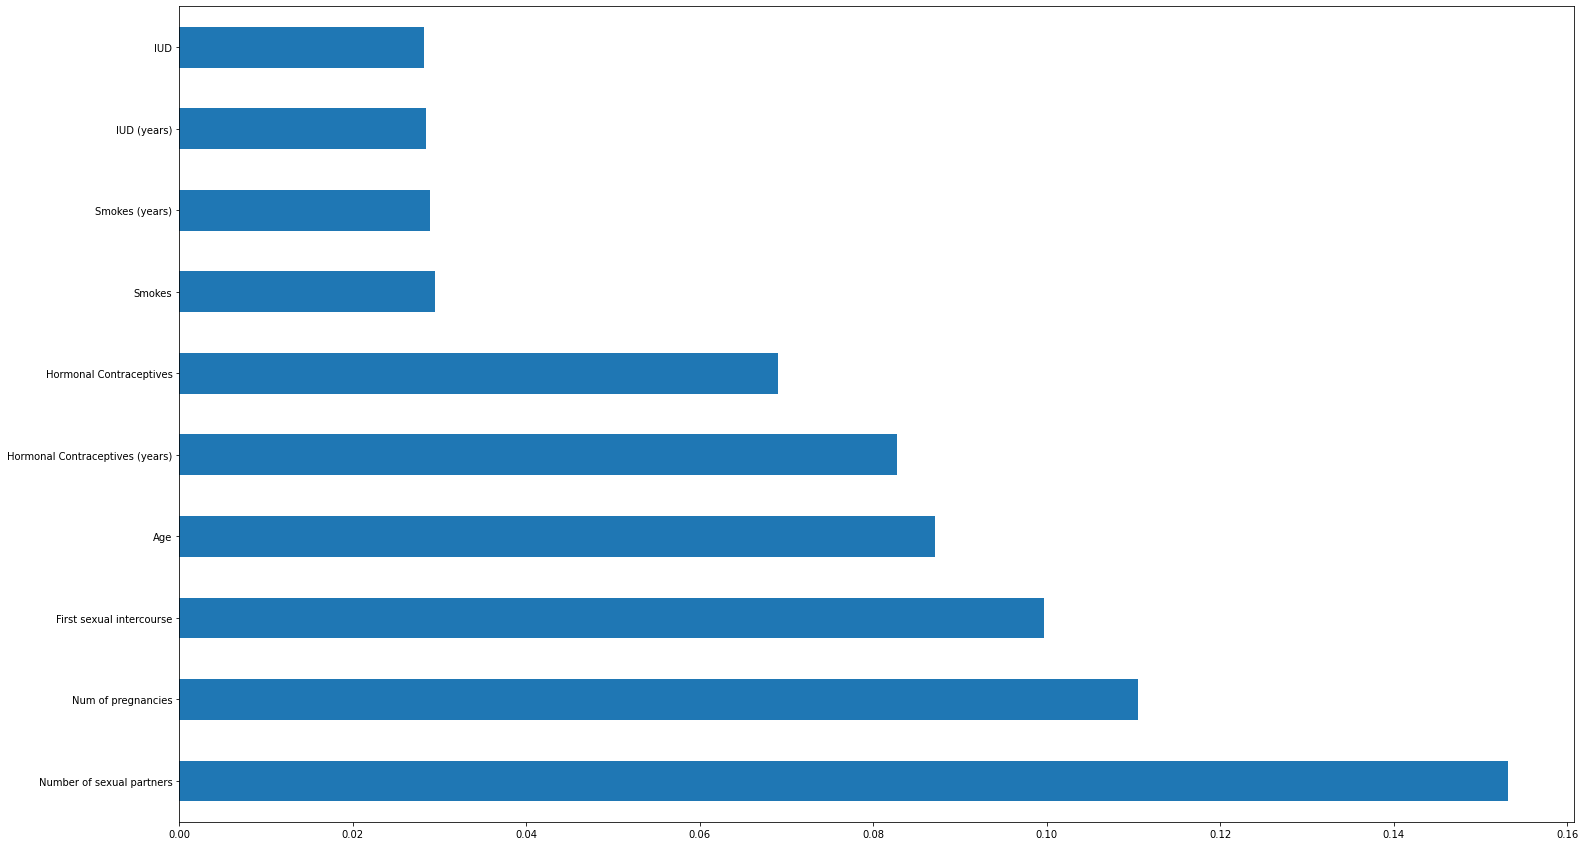

<Figure size 504x1080 with 0 Axes>

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
plt.figure(figsize=(7,15)) ; 


## Creating Neural Network

In [ ]:
nn_model_ten_features = Sequential()
nn_model_ten_features.add(Dense(60, input_dim=10, activation='relu'))
nn_model_ten_features.add(Dense(20, activation='relu'))
nn_model_ten_features.add(Dropout(0.5))
nn_model_ten_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_ten_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_ten_features.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 60)                660       
_________________________________________________________________
dense_32 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 21        
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
####
# Creating top 10 features dataframe
####
X_ten_features=X_resampled_df_1[['Age' ,'Number of sexual partners','First sexual intercourse' , 'Hormonal Contraceptives' , 'Hormonal Contraceptives (years)','Num of pregnancies','Smokes' ,'Smokes (years)','IUD','IUD (years)']]

In [ ]:
####
# Viewing top 10 features dataframe
####
X_ten_features

,Age,Number of sexual partners,First sexual intercourse,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,Smokes,Smokes (years),IUD,IUD (years)
0,0,0,0,0.000000,0.000000,1,0.0,0.000000,0.0,0.0
1,8,0,0,0.000000,0.000000,1,0.0,0.000000,0.0,0.0
2,9,9,3,1.000000,3.000000,8,1.0,37.000000,0.0,0.0
3,9,6,9,0.000000,0.000000,4,0.0,0.000000,0.0,0.0
4,9,6,9,1.000000,2.000000,8,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1086,7,6,4,1.000000,1.151133,8,1.0,13.622167,0.0,0.0
1087,5,5,4,0.828841,2.486523,0,1.0,8.657682,0.0,0.0
1088,7,5,6,1.000000,9.161849,6,1.0,9.209538,0.0,0.0
1089,6,0,0,0.000000,0.000000,7,1.0,21.854750,0.0,0.0


In [ ]:
####
# Training and testing NN model
####


X_train, X_test, Y_train, Y_test = train_test_split(X_ten_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_ten_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_ten = nn_model_ten_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_ten_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_ten_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_ten_features = recall_score(Y_test, y_pred , average="binary")
F1_score_ten_features = f1_score(Y_test, y_pred , average="binary")
cm_ten_features = confusion_matrix(Y_test, y_pred)





accuracy_list_discretization.append(test_acc_ten)
precesion_list_discretization.append(precision_ten_features)
f1_score_list_discretization.append(F1_score_ten_features)
recall_list_discretization.append(recall_ten_features)
cm_list_discretization.append(cm_ten_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7250 - accuracy: 0.5898
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6115 - accuracy: 0.6776
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5541 - accuracy: 0.7195
Epoch 4/50
763/763 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.6959
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5246 - accuracy: 0.7444
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5127 - accuracy: 0.7353
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4799 - accuracy: 0.7654
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4892 - accuracy: 0.7602
Epoch 9/50
763/763 [==============================] - 2s 2ms/step - loss: 0.4753 - accuracy: 0.7680
Epoch 10/50
763/763 [==============================] - 2s 2ms/step - loss: 0.4584 - accuracy: 0.7746

## Creating CNN model

In [ ]:
model_cnn_ten = Sequential([
  Conv1D(8, 3, input_shape=(10,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_ten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_ten.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 10, 8)             32        
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 5, 8)              0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 41        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_list = []
for index , item in X_ten_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_ten.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_ten, test_acc_cnn_ten = model_cnn_ten.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_ten.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_ten= precision_score(Y_test, y_pred , average="macro")
recall_cnn_ten= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_ten = f1_score(Y_test, y_pred , average="macro")
cm_cnn_ten= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_ten)
precesion_list_discretization_cnn.append(precision_cnn_ten)
f1_score_list_discretization_cnn.append(F1_score_cnn_ten)
recall_list_discretization_cnn.append(recall_cnn_ten)
cm_list_discretization_cnn.append(cm_cnn_ten)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6618 - accuracy: 0.6304
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6144 - accuracy: 0.6789
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5996 - accuracy: 0.6959
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5990 - accuracy: 0.6999
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5923 - accuracy: 0.7130
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5912 - accuracy: 0.7248
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5858 - accuracy: 0.7130
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5850 - accuracy: 0.7274
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5796 - accuracy: 0.7221
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5825 - accuracy: 0.7208

## Using top 15 Features

[0.08494234 0.15448269 0.09795736 0.11074412 0.02883966 0.03012648
 0.02756954 0.07463429 0.0835051  0.03195134 0.02575694 0.01535428
 0.01002067 0.0140234  0.01280534 0.00737203 0.01532862 0.01062884
 0.01083906 0.00711781 0.00675925 0.01211547 0.01261937 0.01066903
 0.0095714  0.00786825 0.00928313 0.00804976 0.02162701 0.00779795
 0.0199286  0.01971087]


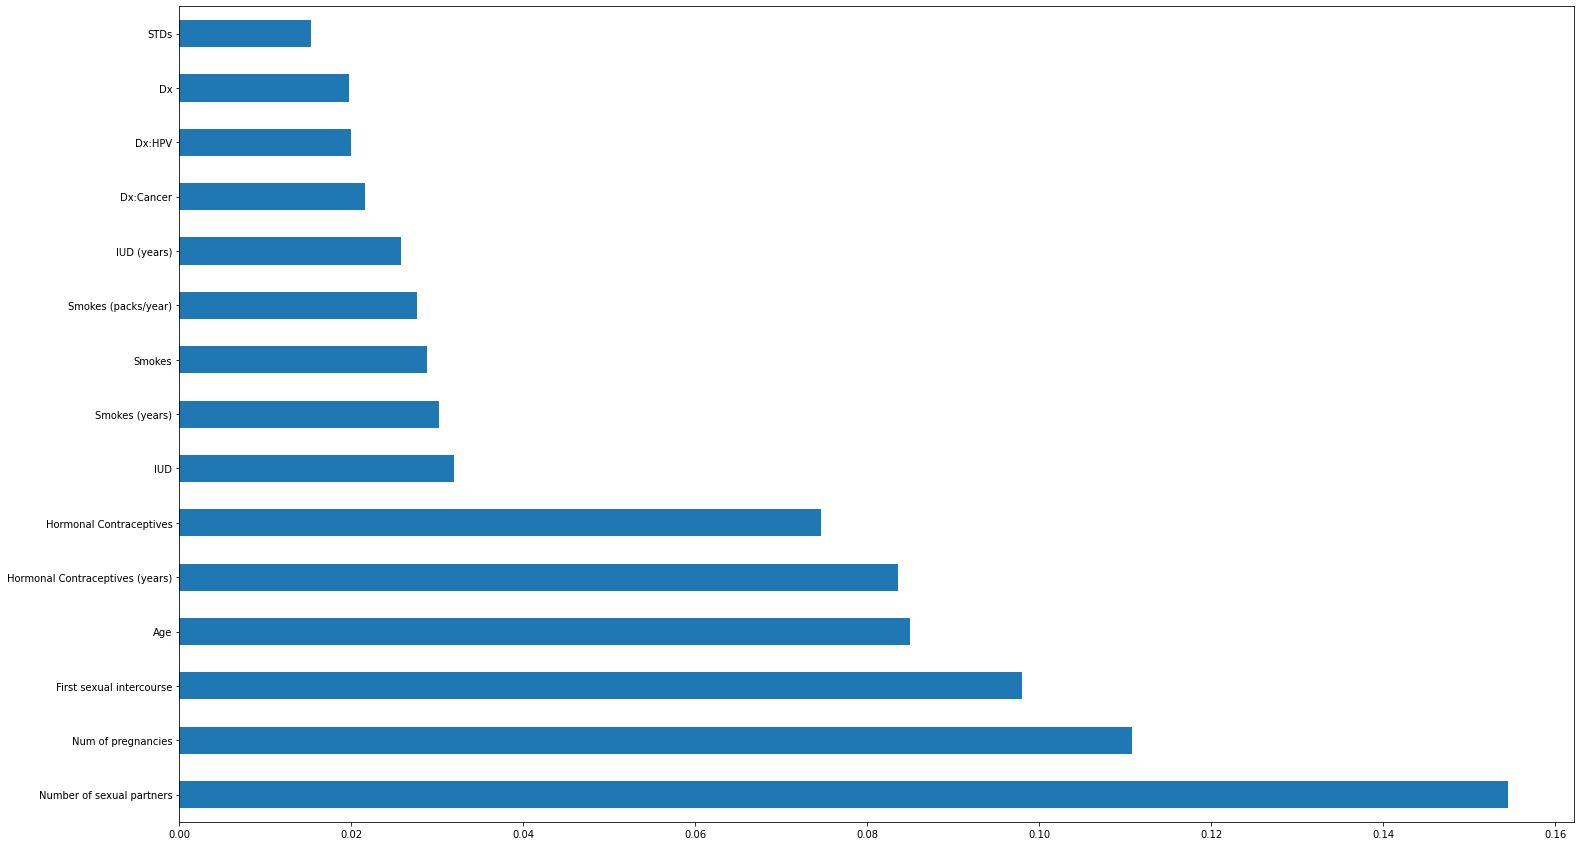

<Figure size 504x1080 with 0 Axes>

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.figure(figsize=(7,15)) ; 
plt.show()

## Creating NN Model

In [ ]:
nn_model_15_features = Sequential()
nn_model_15_features.add(Dense(60, input_dim=15, activation='relu'))
nn_model_15_features.add(Dense(20, activation='relu'))
nn_model_15_features.add(Dropout(0.5))
nn_model_15_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_15_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_15_features.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 60)                960       
_________________________________________________________________
dense_36 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 21        
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
####
# Getting the top 15 Feature in dataframe
####

X_15_features=X_resampled_df_1[feat_importances.nlargest(15).index]

In [ ]:
####
# Viewing the top 15 Feature dataframe
####
X_15_features

,Number of sexual partners,Num of pregnancies,First sexual intercourse,Age,Hormonal Contraceptives (years),Hormonal Contraceptives,IUD,Smokes (years),Smokes,Smokes (packs/year),IUD (years),Dx,Dx:HPV,STDs,Dx:Cancer
0,0,1,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,1,0,8,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,9,8,3,9,3.000000,1.000000,0.0,37.000000,1.0,37.000000,0.0,0.0,1.0,0.0,1.0
3,6,4,9,9,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,6,8,9,9,2.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,6,8,4,7,1.151133,1.000000,0.0,13.622167,1.0,1.396222,0.0,0.0,0.0,1.0,0.0
1087,5,0,4,5,2.486523,0.828841,0.0,8.657682,1.0,1.238747,0.0,0.0,0.0,1.0,0.0
1088,5,6,6,7,9.161849,1.000000,0.0,9.209538,1.0,1.130491,0.0,0.0,0.0,0.0,0.0
1089,0,7,0,6,0.000000,0.000000,0.0,21.854750,1.0,3.274823,0.0,0.0,0.0,1.0,0.0


In [ ]:

####
# Training and testing the NN model 
####

X_train, X_test, Y_train, Y_test = train_test_split(X_15_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_15_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_15 = nn_model_15_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_15_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_15_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_15_features = recall_score(Y_test, y_pred , average="binary")
F1_score_15_features = f1_score(Y_test, y_pred , average="binary")
cm_15_features = confusion_matrix(Y_test, y_pred)



accuracy_list_discretization.append(test_acc_15)
precesion_list_discretization.append(precision_15_features)
f1_score_list_discretization.append(F1_score_15_features)
recall_list_discretization.append(recall_15_features)
cm_list_discretization.append(cm_15_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7008 - accuracy: 0.6160
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5641 - accuracy: 0.7090
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5408 - accuracy: 0.7353
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4975 - accuracy: 0.7379
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4855 - accuracy: 0.7615
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4494 - accuracy: 0.7602
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4311 - accuracy: 0.7864
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4203 - accuracy: 0.7798
Epoch 9/50
763/763 [==============================] - 2s 2ms/step - loss: 0.3933 - accuracy: 0.8178
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4146 - accuracy: 0.7890

## Creating the CNN Model

In [ ]:
model_cnn_15 = Sequential([
  Conv1D(8, 3, input_shape=(15,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_15.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_15.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 15, 8)             32        
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 8, 8)              0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_list = []
for index , item in X_15_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_15.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_15, test_acc_cnn_15 = model_cnn_15.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_15.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_15= precision_score(Y_test, y_pred , average="macro")
recall_cnn_15= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_15 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_15= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_15)
precesion_list_discretization_cnn.append(precision_cnn_15)
f1_score_list_discretization_cnn.append(F1_score_cnn_15)
recall_list_discretization_cnn.append(recall_cnn_15)
cm_list_discretization_cnn.append(cm_cnn_15)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7033 - accuracy: 0.5963
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5841 - accuracy: 0.6815
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5506 - accuracy: 0.7261
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5302 - accuracy: 0.7405
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5182 - accuracy: 0.7510
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5081 - accuracy: 0.7680
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5066 - accuracy: 0.7457
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4958 - accuracy: 0.7733
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4936 - accuracy: 0.7615
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4893 - accuracy: 0.7575

## Using Top 20 Features 

[0.08659285 0.14800665 0.10143347 0.11268003 0.02626286 0.031398
 0.0279189  0.07845775 0.08210892 0.03420637 0.0247602  0.01032235
 0.01241109 0.01757285 0.00987555 0.01056853 0.01523446 0.01419596
 0.00620322 0.00452718 0.01183608 0.01033871 0.01055683 0.01148137
 0.00539976 0.00977304 0.00674118 0.00895837 0.02173833 0.00817471
 0.02126597 0.01899843]


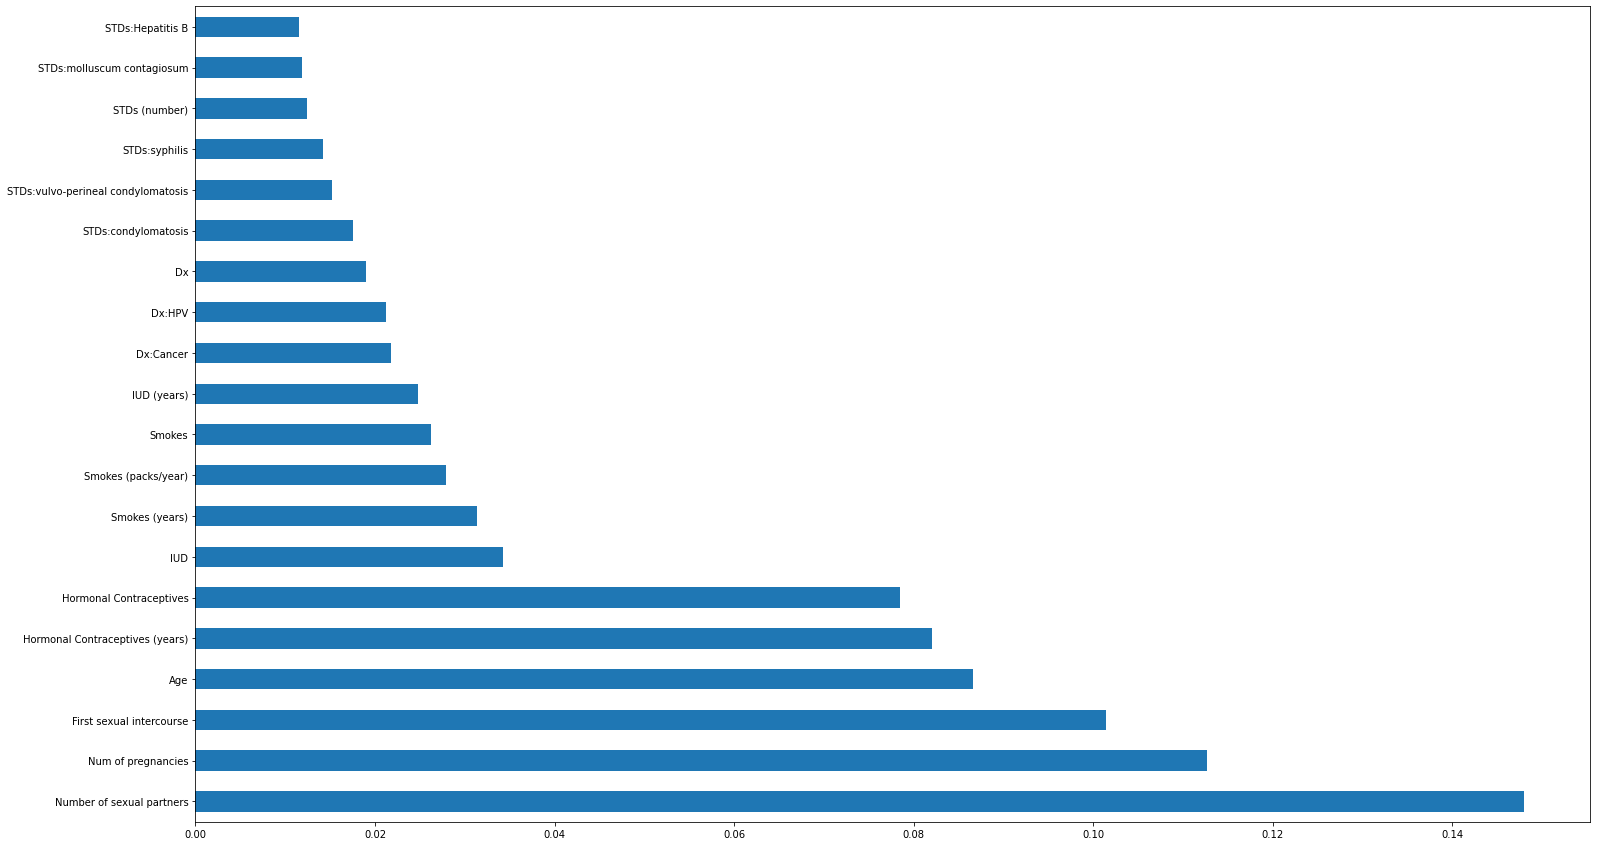

<Figure size 504x1080 with 0 Axes>

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.figure(figsize=(7,15)) ; 

plt.show()

## Creating Neural Network

In [ ]:
nn_model_20_features = Sequential()
nn_model_20_features.add(Dense(60, input_dim=20, activation='relu'))
nn_model_20_features.add(Dense(20, activation='relu'))
nn_model_20_features.add(Dropout(0.5))
nn_model_20_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_20_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_20_features.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 60)                1260      
_________________________________________________________________
dense_40 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 21        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###
#Creating top 20 Features Dataframe
####

X_20_features=X_resampled_df_1[feat_importances.nlargest(20).index]

In [ ]:
###
#Viewing top 20 Features Dataframe
####

X_20_features

,Number of sexual partners,Num of pregnancies,First sexual intercourse,Age,Hormonal Contraceptives (years),Hormonal Contraceptives,Smokes,IUD,Smokes (years),Smokes (packs/year),IUD (years),Dx:Cancer,Dx,STDs,Dx:HPV,STDs:cervical condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:vaginal condylomatosis,STDs (number)
0,0,1,0,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0,1,0,8,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,9,8,3,9,3.000000,1.000000,1.0,0.0,37.000000,37.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000
3,6,4,9,9,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,6,8,9,9,2.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,6,8,4,7,1.151133,1.000000,1.0,0.0,13.622167,1.396222,0.0,0.0,0.0,1.0,0.0,0.0,0.075567,0.0,0.0,1.075567
1087,5,0,4,5,2.486523,0.828841,1.0,0.0,8.657682,1.238747,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,2.000000
1088,5,6,6,7,9.161849,1.000000,1.0,0.0,9.209538,1.130491,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1089,0,7,0,6,0.000000,0.000000,1.0,0.0,21.854750,3.274823,0.0,0.0,0.0,1.0,0.0,0.0,0.009683,0.0,0.0,1.009683


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_20_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_20_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_20 = nn_model_20_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_20_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_20_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_20_features = recall_score(Y_test, y_pred , average="binary")
F1_score_20_features = f1_score(Y_test, y_pred , average="binary")
cm_20_features = confusion_matrix(Y_test, y_pred)






accuracy_list_discretization.append(test_acc_20)
precesion_list_discretization.append(precision_20_features)
f1_score_list_discretization.append(F1_score_20_features)
recall_list_discretization.append(recall_20_features)
cm_list_discretization.append(cm_20_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6847 - accuracy: 0.6527
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5401 - accuracy: 0.7457
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4726 - accuracy: 0.7720
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4609 - accuracy: 0.7798
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4188 - accuracy: 0.8060
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4088 - accuracy: 0.8087
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4127 - accuracy: 0.8113
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.3877 - accuracy: 0.8060
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.3634 - accuracy: 0.8165
Epoch 10/50
763/763 [==============================] - 2s 2ms/step - loss: 0.3600 - accuracy: 0.8375

## Creating CNN Model

In [ ]:
model_cnn_20 = Sequential([
  Conv1D(8, 3, input_shape=(20,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_20.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 20, 8)             32        
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 10, 8)             0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 81        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_list = []
for index , item in X_20_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_20.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_20, test_acc_cnn_20 = model_cnn_20.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_20.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_20= precision_score(Y_test, y_pred , average="macro")
recall_cnn_20= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_20 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_20= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_20)
precesion_list_discretization_cnn.append(precision_cnn_20)
f1_score_list_discretization_cnn.append(F1_score_cnn_20)
recall_list_discretization_cnn.append(recall_cnn_20)
cm_list_discretization_cnn.append(cm_cnn_20)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6325 - accuracy: 0.6723
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5537 - accuracy: 0.7117
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5281 - accuracy: 0.7418
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5108 - accuracy: 0.7562
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5015 - accuracy: 0.7615
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4957 - accuracy: 0.7562
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4883 - accuracy: 0.7602
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4863 - accuracy: 0.7720
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4848 - accuracy: 0.7588
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4772 - accuracy: 0.7654

## Using Top 25 Features

[0.08542073 0.1449193  0.09795714 0.1182744  0.02778151 0.02901172
 0.02830033 0.08394914 0.08248281 0.03363681 0.02684976 0.01529038
 0.01005141 0.01386336 0.00961613 0.00739593 0.01867945 0.01414584
 0.01348929 0.00274401 0.01386143 0.00790825 0.00911851 0.00622447
 0.00579633 0.00637091 0.00918079 0.0081103  0.02273884 0.00859204
 0.01903567 0.019203  ]


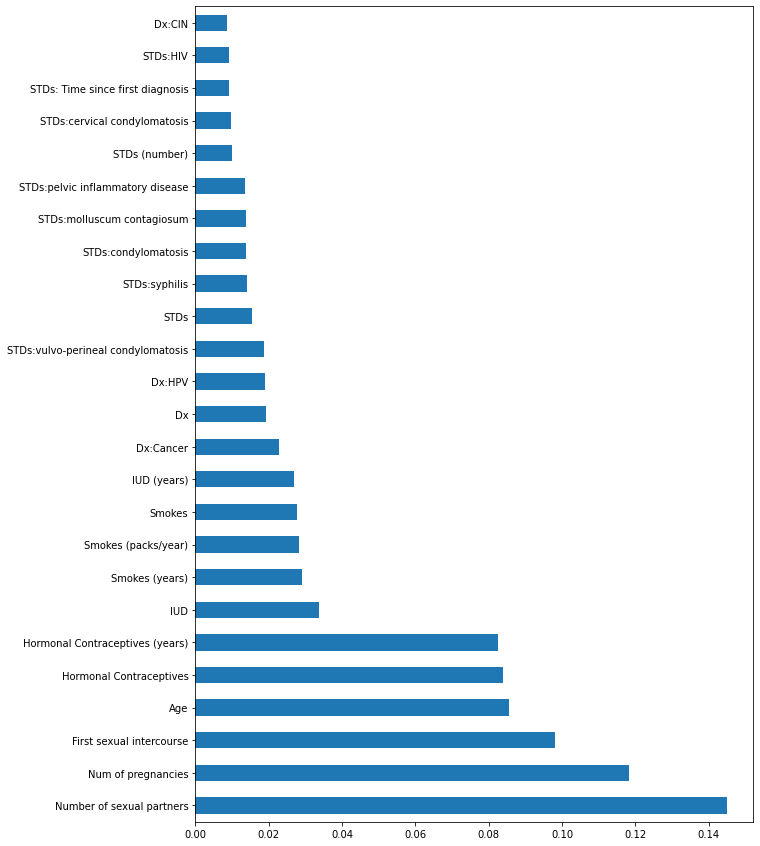

<Figure size 504x1080 with 0 Axes>

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh' , figsize = (10,15))
plt.figure(figsize=(7,15)) ; 
plt.show()

## Creating Neural Network

In [ ]:
nn_model_25_features = Sequential()
nn_model_25_features.add(Dense(60, input_dim=25, activation='relu'))
nn_model_25_features.add(Dense(20, activation='relu'))
nn_model_25_features.add(Dropout(0.5))
nn_model_25_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_25_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_25_features.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 60)                1560      
_________________________________________________________________
dense_44 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 21        
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###
#Creating top 25 features dataframe
###
X_25_features=X_resampled_df_1[feat_importances.nlargest(25).index]

In [ ]:
###
#Viewing top 25 features dataframe
###
X_25_features

,Number of sexual partners,Num of pregnancies,First sexual intercourse,Age,Hormonal Contraceptives (years),Hormonal Contraceptives,Smokes (packs/year),IUD,Smokes,Smokes (years),IUD (years),Dx:Cancer,Dx:HPV,Dx,STDs,STDs:vulvo-perineal condylomatosis,STDs:condylomatosis,STDs:AIDS,STDs:pelvic inflammatory disease,STDs:molluscum contagiosum,STDs:HIV,STDs:syphilis,STDs (number),STDs:Hepatitis B,STDs: Time since first diagnosis
0,0,1,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000
1,0,1,0,8,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000
2,9,8,3,9,3.000000,1.000000,37.000000,0.0,1.0,37.000000,0.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000
3,6,4,9,9,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000
4,6,8,9,9,2.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,6,8,4,7,1.151133,1.000000,1.396222,0.0,1.0,13.622167,0.0,0.0,0.0,0.0,1.0,0.075567,0.075567,0.0,0.0,0.0,0.924433,0.0,1.075567,0.0,15.319901
1087,5,0,4,5,2.486523,0.828841,1.238747,0.0,1.0,8.657682,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,2.000000,0.0,6.657682
1088,5,6,6,7,9.161849,1.000000,1.130491,0.0,1.0,9.209538,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000
1089,0,7,0,6,0.000000,0.000000,3.274823,0.0,1.0,21.854750,0.0,0.0,0.0,0.0,1.0,0.009683,0.009683,0.0,0.0,0.0,0.990317,0.0,1.009683,0.0,3.019367


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_25_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_25_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_25 = nn_model_25_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_25_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_25_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_25_features = recall_score(Y_test, y_pred , average="binary")
F1_score_25_features = f1_score(Y_test, y_pred , average="binary")
cm_25_features = confusion_matrix(Y_test, y_pred)




accuracy_list_discretization.append(test_acc_25)
precesion_list_discretization.append(precision_25_features)
f1_score_list_discretization.append(F1_score_25_features)
recall_list_discretization.append(recall_25_features)
cm_list_discretization.append(cm_25_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6548 - accuracy: 0.6579
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5489 - accuracy: 0.7025
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5096 - accuracy: 0.7379
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5014 - accuracy: 0.7772
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4501 - accuracy: 0.7772
Epoch 6/50
763/763 [==============================] - 2s 2ms/step - loss: 0.4252 - accuracy: 0.7969
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4088 - accuracy: 0.8047
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.3952 - accuracy: 0.8113
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.3654 - accuracy: 0.8322
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.3613 - accuracy: 0.8244

## Creating CNN Model

In [ ]:
model_cnn_25 = Sequential([
  Conv1D(8, 3, input_shape=(25,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_25.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_25.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 25, 8)             32        
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 13, 8)             0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 104)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 105       
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_list = []
for index , item in X_25_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_25.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_25, test_acc_cnn_25 = model_cnn_25.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_25.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_25= precision_score(Y_test, y_pred , average="macro")
recall_cnn_25= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_25 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_25= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_25)
precesion_list_discretization_cnn.append(precision_cnn_25)
f1_score_list_discretization_cnn.append(F1_score_cnn_25)
recall_list_discretization_cnn.append(recall_cnn_25)
cm_list_discretization_cnn.append(cm_cnn_25)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6888 - accuracy: 0.6173
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5724 - accuracy: 0.6710
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5384 - accuracy: 0.7300
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5195 - accuracy: 0.7523
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5127 - accuracy: 0.7562
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4990 - accuracy: 0.7654
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4927 - accuracy: 0.7641
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4871 - accuracy: 0.7785
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4842 - accuracy: 0.7811
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4814 - accuracy: 0.7720

## Using all Features

[0.08515501 0.1542     0.09669918 0.10754601 0.02983    0.02978491
 0.02744559 0.08373353 0.08321379 0.03235975 0.0248369  0.01568413
 0.01039847 0.01515859 0.00991837 0.01055714 0.01345399 0.00848459
 0.01480452 0.00241263 0.01220918 0.00576034 0.01388742 0.01064297
 0.00921915 0.0066393  0.00865949 0.00763239 0.0227692  0.00842728
 0.02124995 0.01722624]


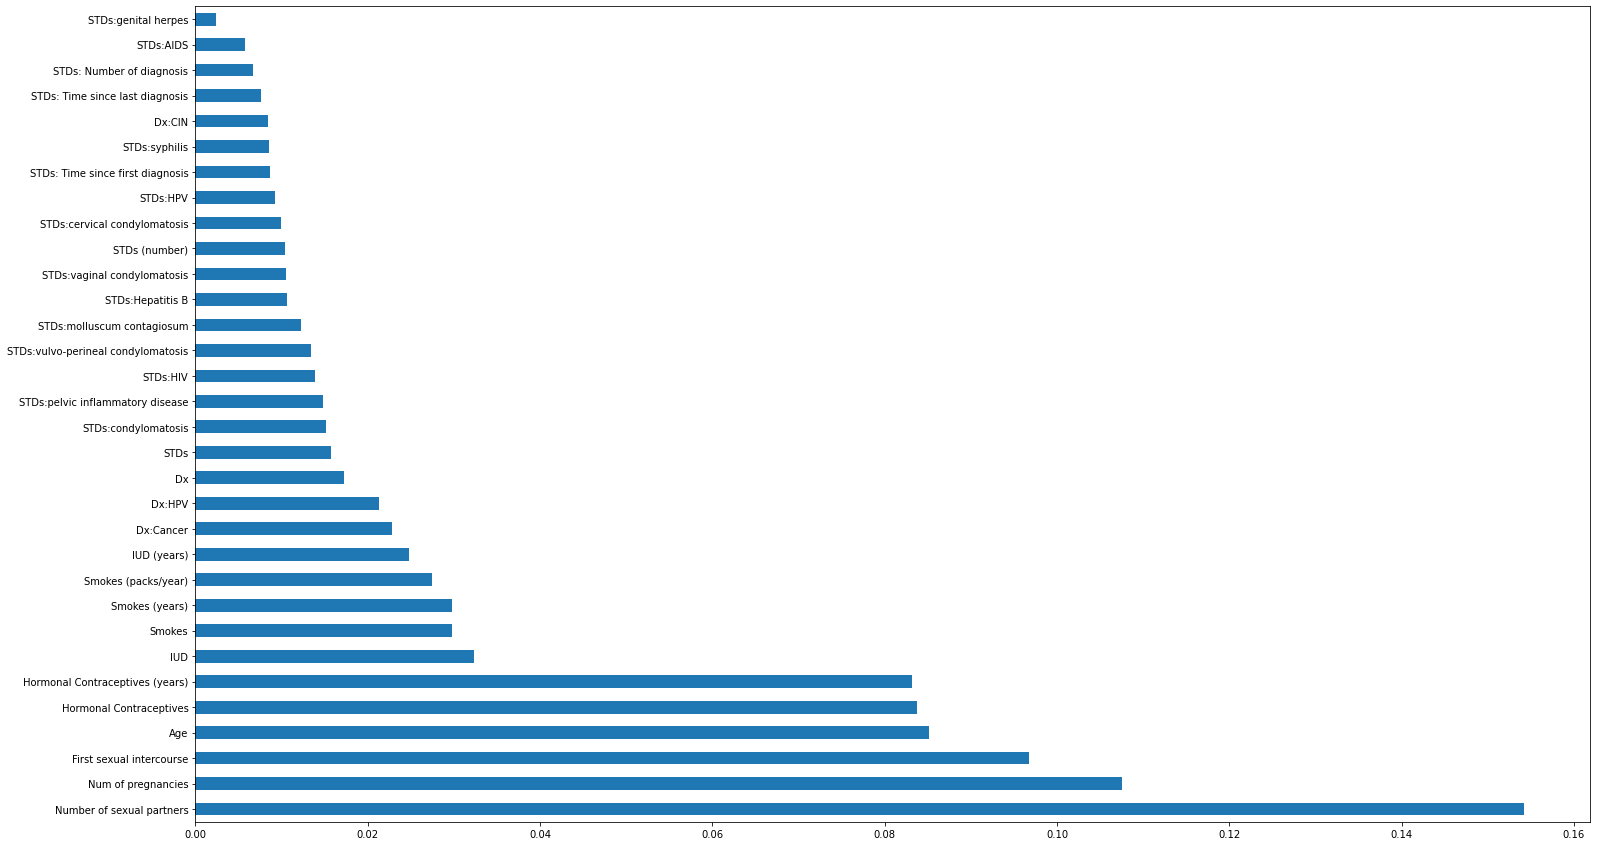

<Figure size 504x1080 with 0 Axes>

In [ ]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(32).plot(kind='barh') ; 
plt.show();
plt.figure(figsize=(7,15)) ; 


## Creating Neural Network

In [ ]:
nn_model_all_features = Sequential()
nn_model_all_features.add(Dense(60, input_dim=32, activation='relu'))
nn_model_all_features.add(Dense(20, activation='relu'))
nn_model_all_features.add(Dropout(0.5))
nn_model_all_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_all_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_all_features.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 60)                1980      
_________________________________________________________________
dense_48 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 21        
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###
# Viewing all features dataframe
###
X_resampled_df_1

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,0,0,0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1,8,0,0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
2,9,9,3,8,1.0,37.000000,37.000000,1.000000,3.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,1.0,0.0,1.0,0.0
3,9,6,9,4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
4,9,6,9,8,0.0,0.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,7,6,4,8,1.0,13.622167,1.396222,1.000000,1.151133,0.0,0.0,1.0,1.075567,0.075567,0.0,0.0,0.075567,0.0,0.0,0.0,0.0,0.0,0.924433,0.0,0.0,1.0,15.319901,15.319901,0.0,0.0,0.0,0.0
1087,5,5,4,0,1.0,8.657682,1.238747,0.828841,2.486523,0.0,0.0,1.0,2.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,6.657682,6.657682,0.0,0.0,0.0,0.0
1088,7,5,6,6,1.0,9.209538,1.130491,1.000000,9.161849,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1089,6,0,0,7,1.0,21.854750,3.274823,0.000000,0.000000,0.0,0.0,1.0,1.009683,0.009683,0.0,0.0,0.009683,0.0,0.0,0.0,0.0,0.0,0.990317,0.0,0.0,1.0,3.019367,3.019367,0.0,0.0,0.0,0.0


In [ ]:
####
#Training and testing the model
####

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_df_1, Y_resampled_df, test_size=0.3, random_state=0,shuffle = True)
nn_model_all_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_all = nn_model_all_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_all_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_all_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_all_features = recall_score(Y_test, y_pred , average="binary")
F1_score_all_features = f1_score(Y_test, y_pred , average="binary")
cm_all_features = confusion_matrix(Y_test, y_pred)



accuracy_list_discretization.append(test_acc_all)
precesion_list_discretization.append(precision_all_features)
f1_score_list_discretization.append(F1_score_all_features)
recall_list_discretization.append(recall_all_features)
cm_list_discretization.append(cm_all_features)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.6606 - accuracy: 0.6723
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5327 - accuracy: 0.7313
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5187 - accuracy: 0.7641
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4629 - accuracy: 0.7929
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4374 - accuracy: 0.7942
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4240 - accuracy: 0.8047
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4032 - accuracy: 0.8309
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.3787 - accuracy: 0.8375
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.3795 - accuracy: 0.8349
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.3607 - accuracy: 0.8493

In [ ]:
x_train_list = []
for index , item in X_resampled_df_1.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_all, test_acc_cnn_all = model.evaluate(X_test, Y_test) 
y_pred1 = model.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_all= precision_score(Y_test, y_pred , average="macro")
recall_cnn_all = recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_all = f1_score(Y_test, y_pred , average="macro")
cm_cnn_all = confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_all)
precesion_list_discretization_cnn.append(precision_cnn_all)
f1_score_list_discretization_cnn.append(F1_score_cnn_all)
recall_list_discretization_cnn.append(recall_cnn_all)
cm_list_discretization_cnn.append(cm_cnn_all)

Epoch 1/50
763/763 [==============================] - 2s 3ms/step - loss: 0.7128 - accuracy: 0.6828
Epoch 2/50
763/763 [==============================] - 2s 3ms/step - loss: 0.5368 - accuracy: 0.7300
Epoch 3/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4844 - accuracy: 0.7497
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4641 - accuracy: 0.7549
Epoch 5/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4459 - accuracy: 0.7837
Epoch 6/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4401 - accuracy: 0.7746
Epoch 7/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4366 - accuracy: 0.7759
Epoch 8/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4327 - accuracy: 0.7798
Epoch 9/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4216 - accuracy: 0.7890
Epoch 10/50
763/763 [==============================] - 2s 3ms/step - loss: 0.4224 - accuracy: 0.8008

## Evaluating Results

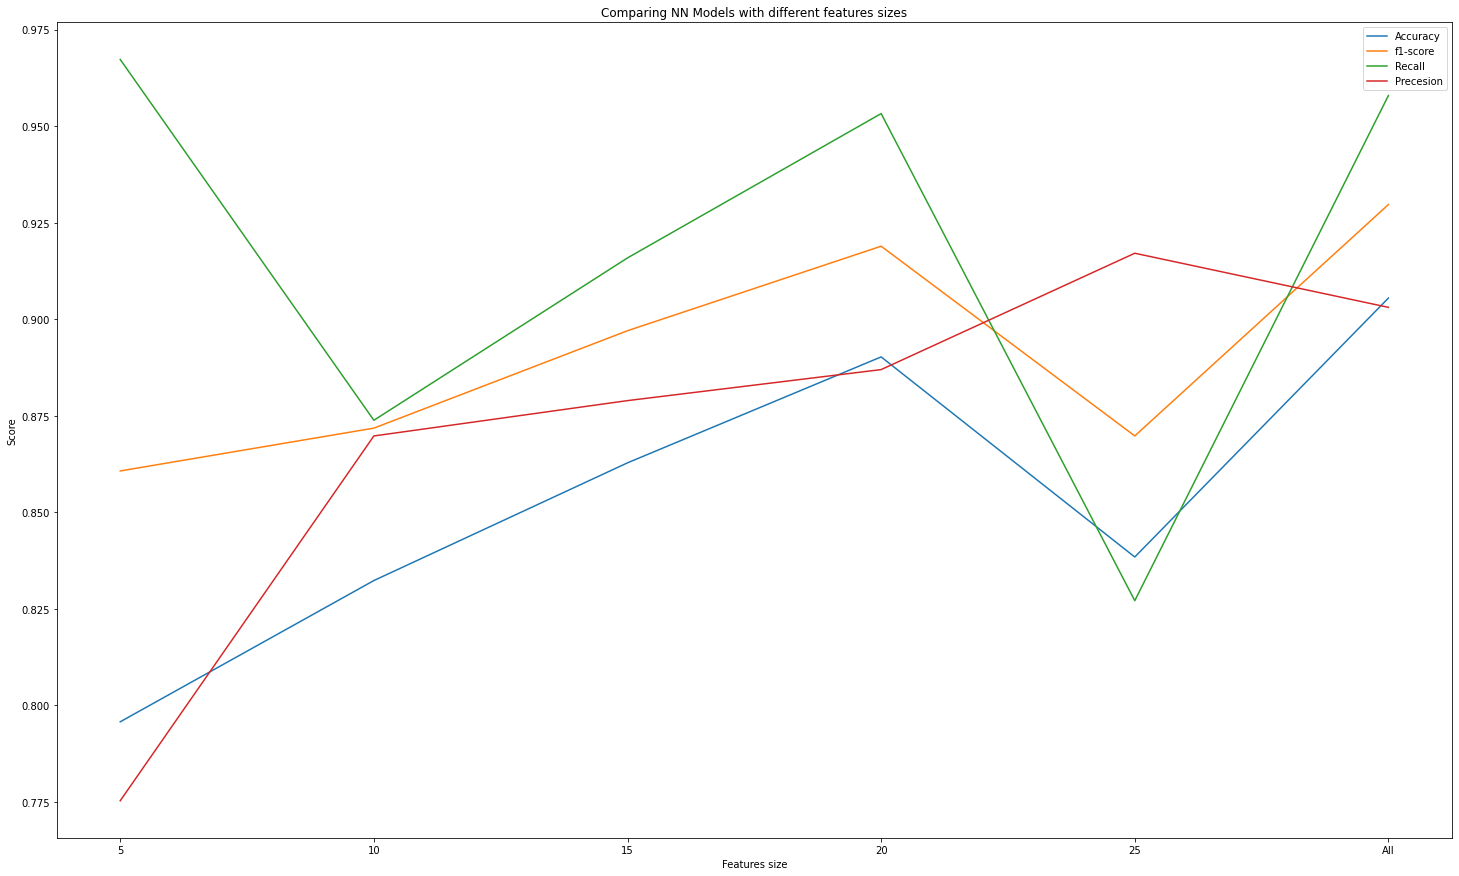

<Figure size 504x1080 with 0 Axes>

In [ ]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization, label = "Accuracy")
plt.plot(xAxis,f1_score_list_discretization, label = "f1-score")
plt.plot(xAxis,recall_list_discretization, label = "Recall")
plt.plot(xAxis,precesion_list_discretization, label = "Precesion")

plt.title('Comparing NN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend()
plt.show()
plt.figure(figsize=(7,15)) ; 





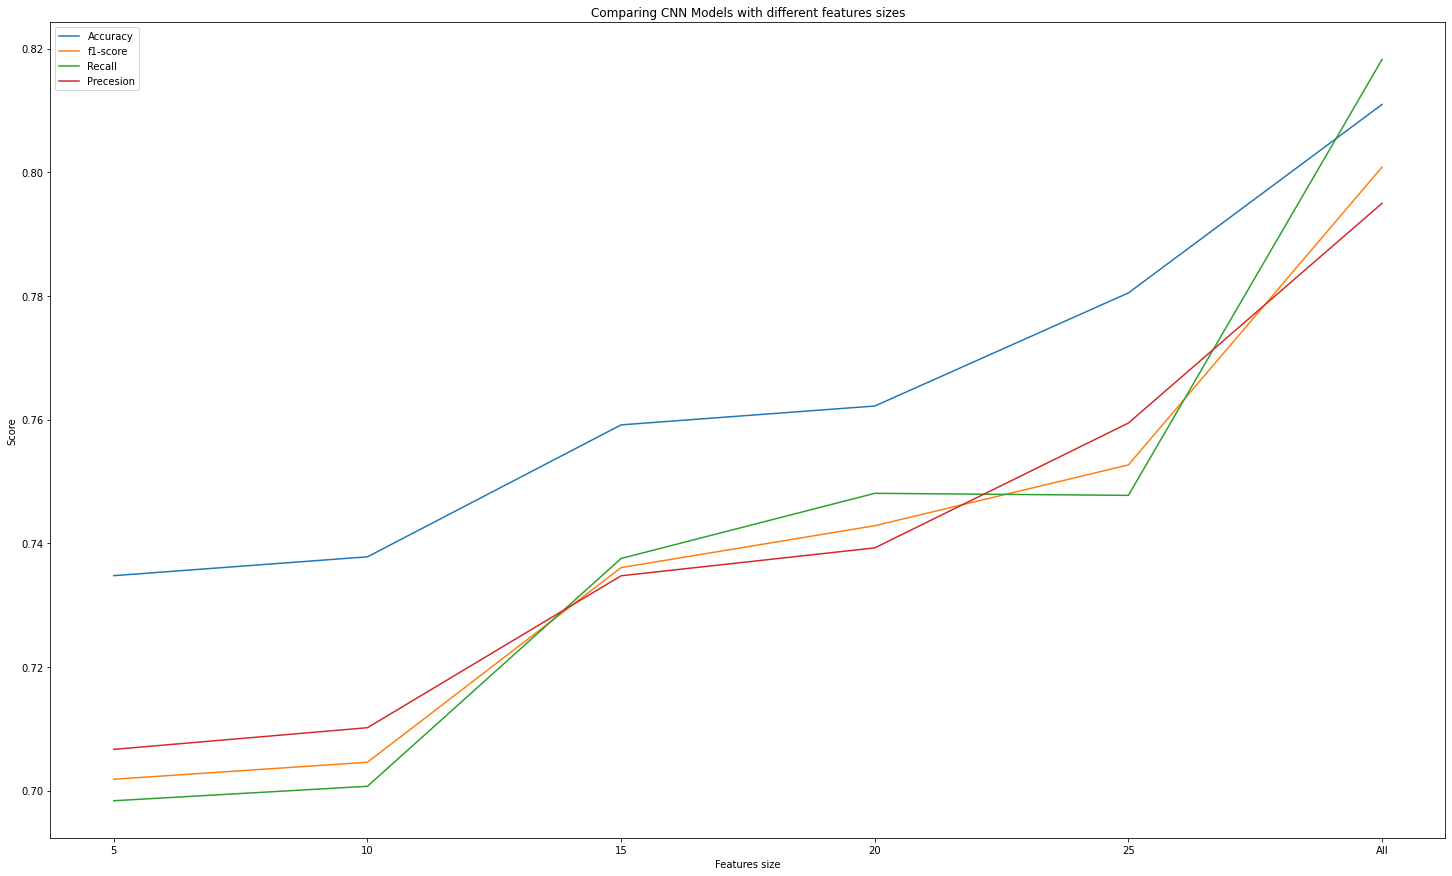

<Figure size 504x1080 with 0 Axes>

In [ ]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization_cnn, label = "Accuracy")
plt.plot(xAxis,f1_score_list_discretization_cnn, label = "f1-score")
plt.plot(xAxis,recall_list_discretization_cnn, label = "Recall")
plt.plot(xAxis,precesion_list_discretization_cnn, label = "Precesion")

plt.title('Comparing CNN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend()
plt.figure(figsize=(7,15)) ; 
plt.show()




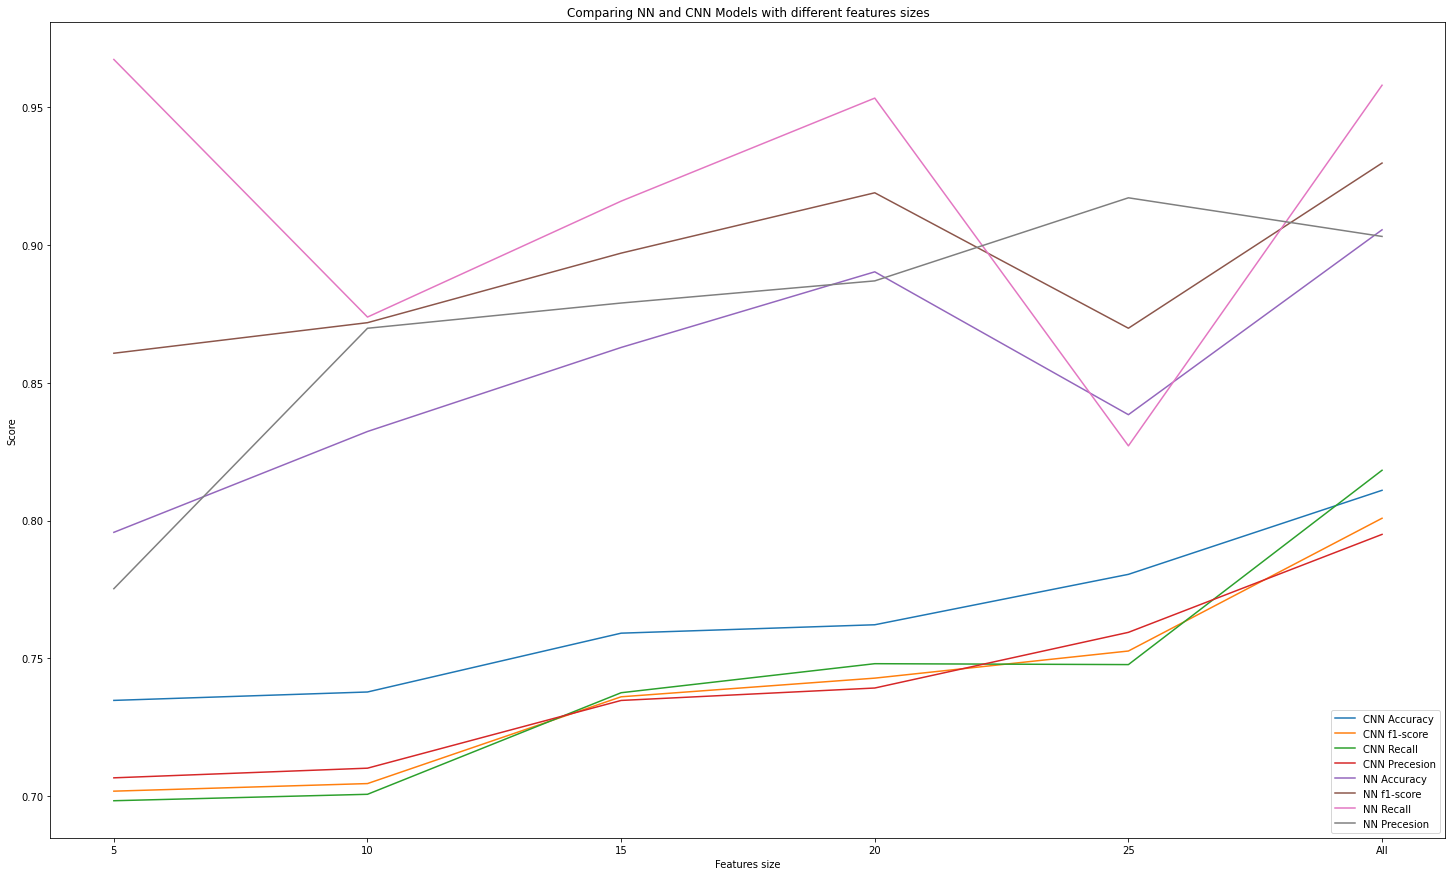

<Figure size 1800x1080 with 0 Axes>

In [ ]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization_cnn, label = "CNN Accuracy")
plt.plot(xAxis,f1_score_list_discretization_cnn, label = "CNN f1-score")
plt.plot(xAxis,recall_list_discretization_cnn, label = "CNN Recall")
plt.plot(xAxis,precesion_list_discretization_cnn, label = "CNN Precesion")

plt.plot(xAxis,accuracy_list_discretization, label = "NN Accuracy")
plt.plot(xAxis,f1_score_list_discretization, label = "NN f1-score")
plt.plot(xAxis,recall_list_discretization, label = "NN Recall")
plt.plot(xAxis,precesion_list_discretization, label = "NN Precesion")


plt.title('Comparing NN and CNN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();
plt.figure(figsize=(25,15)) ; 
plt.show();




## Confusion Matrix

In [ ]:
feature_sizes = [5,10,15,20,25,'All']
print( 'NN Models ' )
for feature_size , confusion_matrix in zip(feature_sizes ,cm_list_discretization):
  print( 'size' , feature_size )
  print( 'confusion matrix ' )
  print(confusion_matrix)
  print('-----')
print('------------------')
print('------------------')
print('------------------')
print( 'CNN Models ' )
for feature_size , confusion_matrix in zip(feature_sizes ,cm_list_discretization_cnn):
  print( 'size' , feature_size )
  print( 'confusion matrix ' )
  print(confusion_matrix)
  print('-----')

NN Models 
size 5
confusion matrix 
[[ 54  60]
 [  7 207]]
-----
size 10
confusion matrix 
[[ 86  28]
 [ 27 187]]
-----
size 15
confusion matrix 
[[ 87  27]
 [ 18 196]]
-----
size 20
confusion matrix 
[[ 88  26]
 [ 10 204]]
-----
size 25
confusion matrix 
[[ 98  16]
 [ 37 177]]
-----
size All
confusion matrix 
[[ 92  22]
 [  9 205]]
-----
------------------
------------------
------------------
CNN Models 
size 5
confusion matrix 
[[ 66  48]
 [ 39 175]]
-----
size 10
confusion matrix 
[[ 66  48]
 [ 38 176]]
-----
size 15
confusion matrix 
[[ 76  38]
 [ 41 173]]
-----
size 20
confusion matrix 
[[ 80  34]
 [ 44 170]]
-----
size 25
confusion matrix 
[[ 73  41]
 [ 31 183]]
-----
size All
confusion matrix 
[[ 96  18]
 [ 44 170]]
-----


# COMPARING WITH AND WITHOUT FEATURE BINNING

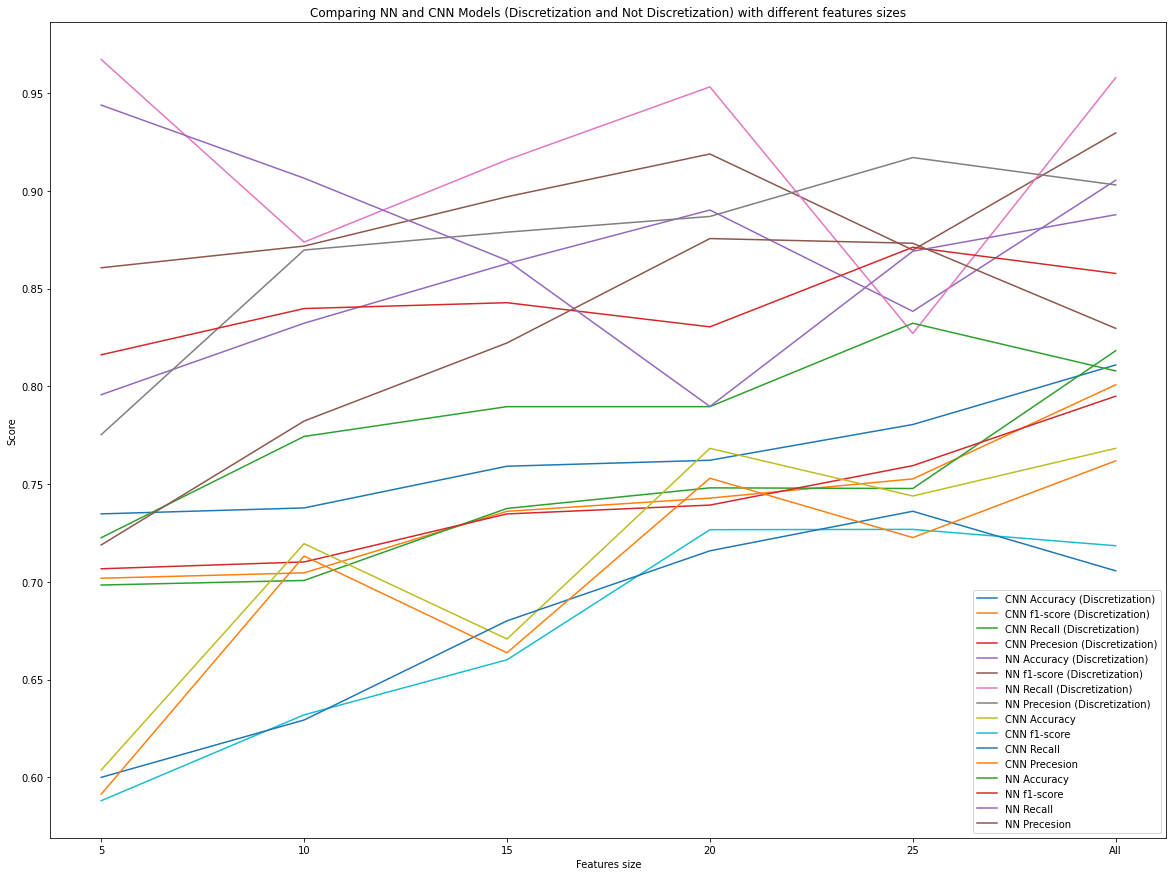

In [ ]:

###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization_cnn,label = "CNN Accuracy (Discretization)" )
plt.plot(xAxis,f1_score_list_discretization_cnn, label = "CNN f1-score (Discretization)")
plt.plot(xAxis,recall_list_discretization_cnn, label = "CNN Recall (Discretization)")
plt.plot(xAxis,precesion_list_discretization_cnn, label = "CNN Precesion (Discretization)")

plt.plot(xAxis,accuracy_list_discretization, label = "NN Accuracy (Discretization)")
plt.plot(xAxis,f1_score_list_discretization, label = "NN f1-score (Discretization)")
plt.plot(xAxis,recall_list_discretization, label = "NN Recall (Discretization)")
plt.plot(xAxis,precesion_list_discretization, label = "NN Precesion (Discretization)")


plt.plot(xAxis,accuracy_list_cnn, label = "CNN Accuracy")
plt.plot(xAxis,f1_score_list_cnn, label = "CNN f1-score")
plt.plot(xAxis,recall_list_cnn, label = "CNN Recall")
plt.plot(xAxis,precesion_list_cnn, label = "CNN Precesion")

plt.plot(xAxis,accuracy_list, label = "NN Accuracy")
plt.plot(xAxis,f1_score_list, label = "NN f1-score")
plt.plot(xAxis,recall_list, label = "NN Recall")
plt.plot(xAxis,precesion_list, label = "NN Precesion")

plt.title('Comparing NN and CNN Models (Discretization and Not Discretization) with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();

plt.rcParams["figure.figsize"] = (25,15)

plt.show();




# Convolutional  Neural Network Evalution

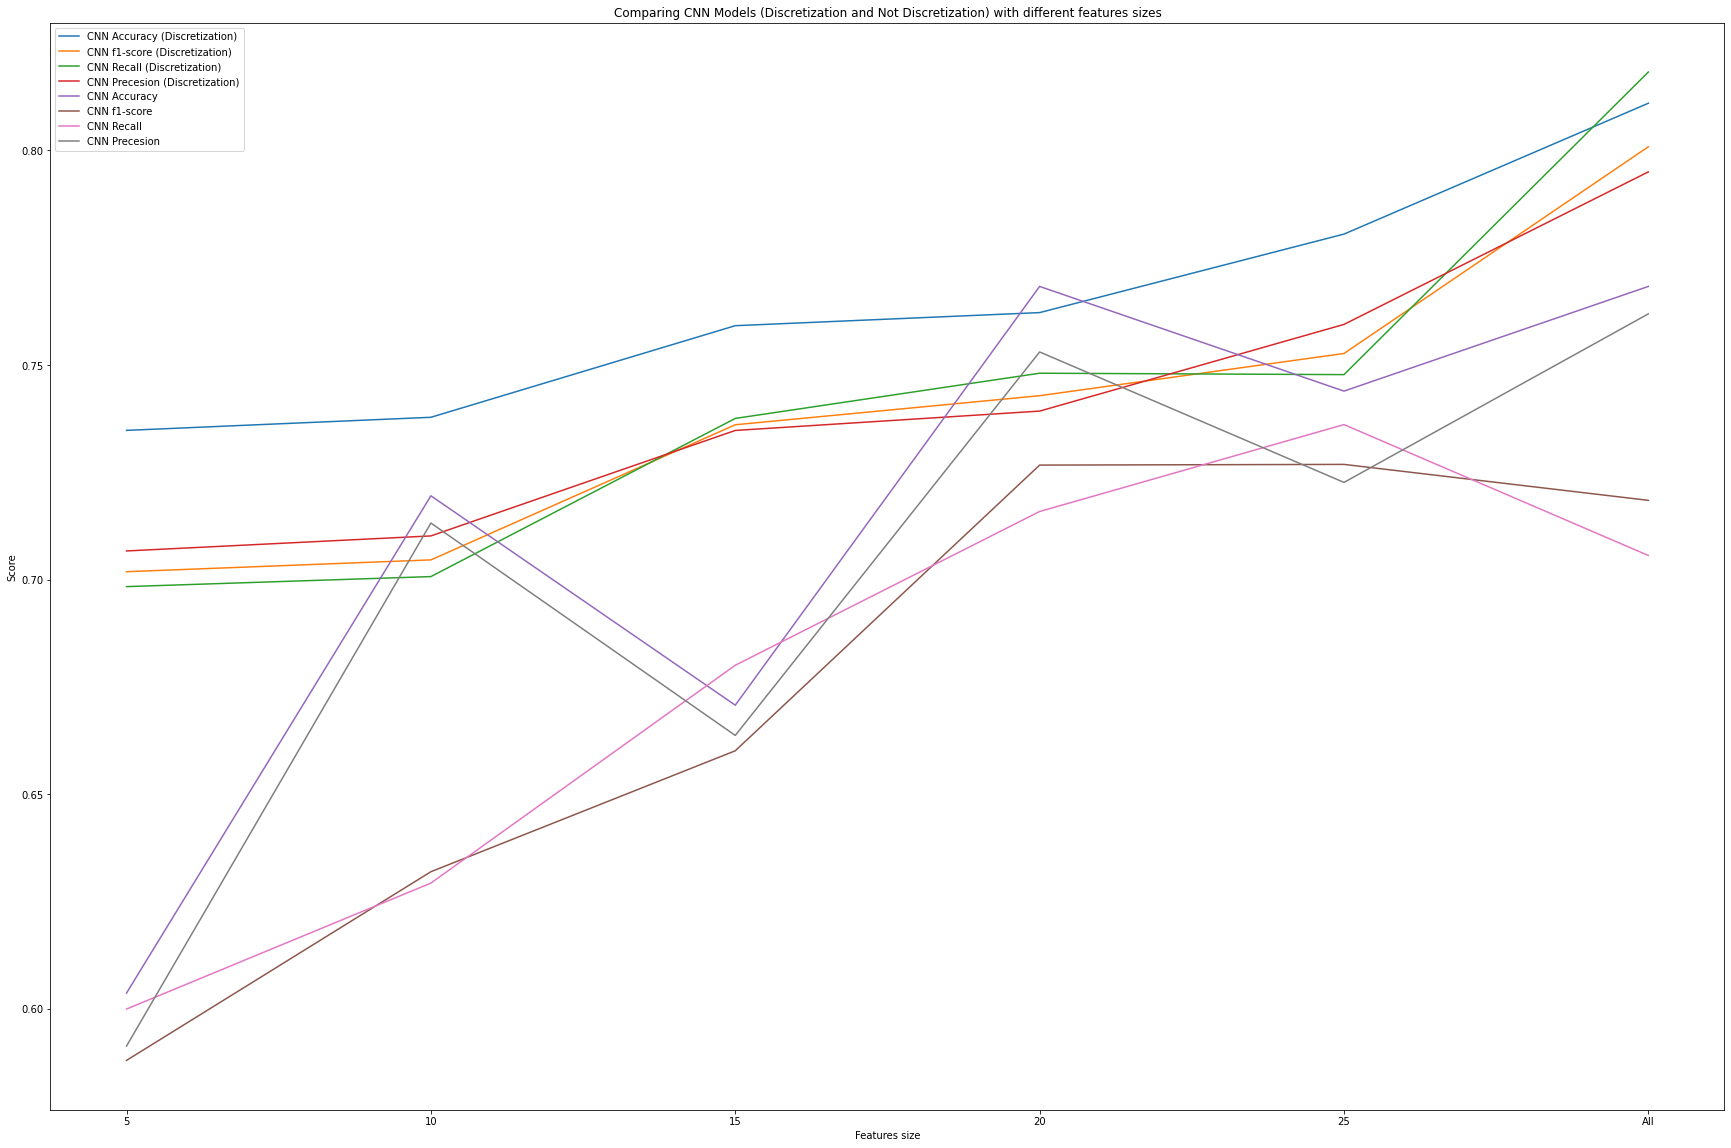

In [ ]:

###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization_cnn,label = "CNN Accuracy (Discretization)" )
plt.plot(xAxis,f1_score_list_discretization_cnn, label = "CNN f1-score (Discretization)")
plt.plot(xAxis,recall_list_discretization_cnn, label = "CNN Recall (Discretization)")
plt.plot(xAxis,precesion_list_discretization_cnn, label = "CNN Precesion (Discretization)")



plt.plot(xAxis,accuracy_list_cnn, label = "CNN Accuracy")
plt.plot(xAxis,f1_score_list_cnn, label = "CNN f1-score")
plt.plot(xAxis,recall_list_cnn, label = "CNN Recall")
plt.plot(xAxis,precesion_list_cnn, label = "CNN Precesion")



plt.title('Comparing CNN Models (Discretization and Not Discretization) with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();

plt.rcParams["figure.figsize"] = (10,20)

plt.show();




# Neural Network Evalution

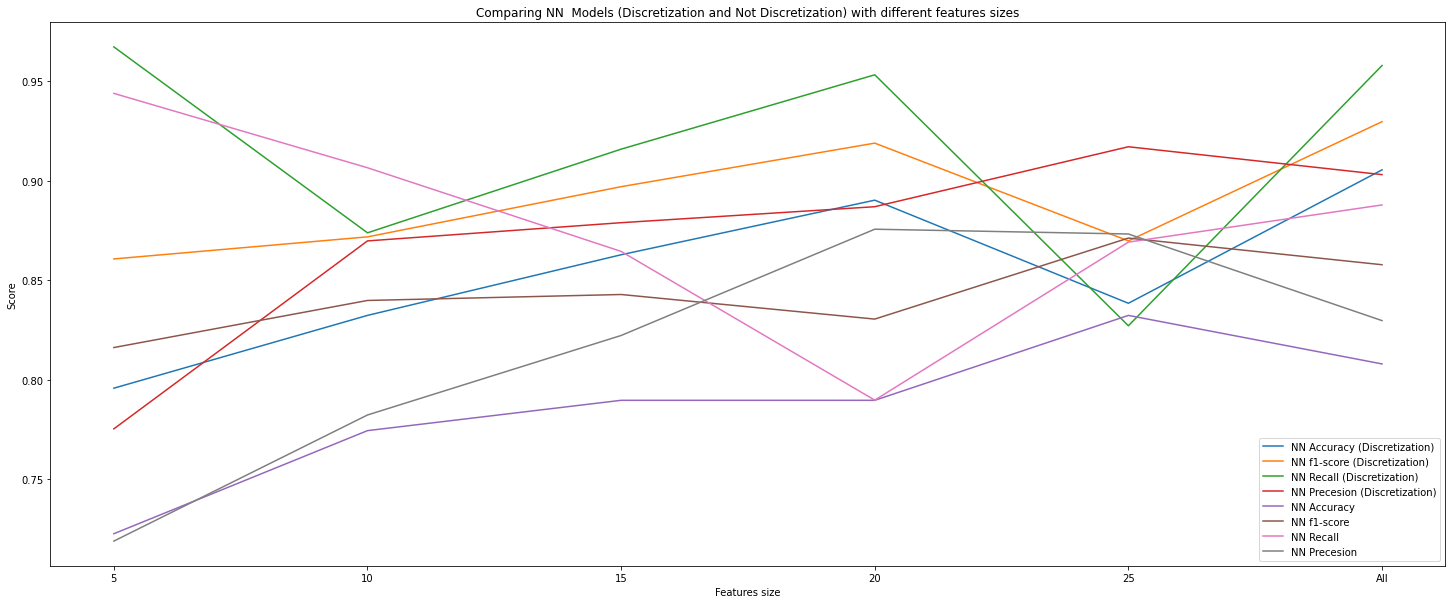

In [ ]:

###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']


plt.plot(xAxis,accuracy_list_discretization, label = "NN Accuracy (Discretization)")
plt.plot(xAxis,f1_score_list_discretization, label = "NN f1-score (Discretization)")
plt.plot(xAxis,recall_list_discretization, label = "NN Recall (Discretization)")
plt.plot(xAxis,precesion_list_discretization, label = "NN Precesion (Discretization)")


plt.plot(xAxis,accuracy_list, label = "NN Accuracy")
plt.plot(xAxis,f1_score_list, label = "NN f1-score")
plt.plot(xAxis,recall_list, label = "NN Recall")
plt.plot(xAxis,precesion_list, label = "NN Precesion")

plt.title('Comparing NN  Models (Discretization and Not Discretization) with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();

plt.rcParams["figure.figsize"] = (10,7)

plt.show();




In [ ]:

final_result_df = pd.DataFrame(list(zip(accuracy_list_discretization_cnn, f1_score_list_discretization_cnn ,
                                      recall_list_discretization_cnn, precesion_list_discretization_cnn , accuracy_list_discretization,
                                      f1_score_list_discretization , recall_list_discretization , precesion_list_discretization,
                                      accuracy_list_cnn, f1_score_list_cnn ,
                                      recall_list_cnn, precesion_list_cnn , accuracy_list,
                                      f1_score_list , recall_list , precesion_list
                                      )), 
               columns =["CNN Accuracy (Discretization)", "CNN f1-score (Discretization)" ,"CNN Recall (Discretization)" ,"CNN Precesion (Discretization)",
               "NN Accuracy (Discretization)", "NN f1-score (Discretization)" ,"NN Recall (Discretization)" ,"NN Precesion (Discretization)" ,
               "CNN Accuracy ", "CNN f1-score" ,"CNN Recall" ,"CNN Precesion",
               "NN Accuracy ", "NN f1-score" ,"NN Recall " ,"NN Precesion " ], index =  [5,10,15,20,25,'All']) 
final_result_df .index.name='Num of Features'

In [ ]:
final_result_df 

,CNN Accuracy (Discretization),CNN f1-score (Discretization),CNN Recall (Discretization),CNN Precesion (Discretization),NN Accuracy (Discretization),NN f1-score (Discretization),NN Recall (Discretization),NN Precesion (Discretization),CNN Accuracy,CNN f1-score,CNN Recall,CNN Precesion,NN Accuracy,NN f1-score,NN Recall,NN Precesion
Num of Features,,,,,,,,,,,,,,,,
5,0.734756,0.701828,0.698352,0.706662,0.795732,0.860707,0.967290,0.775281,0.603659,0.587972,0.599934,0.591311,0.722561,0.816162,0.943925,0.718861
10,0.737805,0.704579,0.700689,0.710165,0.832317,0.871795,0.873832,0.869767,0.719512,0.631928,0.629283,0.713166,0.774390,0.839827,0.906542,0.782258
15,0.759146,0.736063,0.737539,0.734739,0.862805,0.897025,0.915888,0.878924,0.670732,0.660104,0.680030,0.663685,0.789634,0.842825,0.864486,0.822222
20,0.762195,0.742833,0.748073,0.739247,0.890244,0.918919,0.953271,0.886957,0.768293,0.726667,0.715855,0.753027,0.789634,0.830467,0.789720,0.875648
25,0.780488,0.752671,0.747746,0.759444,0.838415,0.869779,0.827103,0.917098,0.743902,0.726829,0.736104,0.722635,0.832317,0.871194,0.869159,0.873239
All,0.810976,0.800838,0.818249,0.794985,0.905488,0.929705,0.957944,0.903084,0.768293,0.718455,0.705607,0.761905,0.807927,0.857788,0.887850,0.829694
